## **Problem Statement**

### Business Context

The prices of the stocks of companies listed under a global exchange are influenced by a variety of factors, with the company's financial performance, innovations and collaborations, and market sentiment being factors that play a significant role. News and media reports can rapidly affect investor perceptions and, consequently, stock prices in the highly competitive financial industry. With the sheer volume of news and opinions from a wide variety of sources, investors and financial analysts often struggle to stay updated and accurately interpret its impact on the market. As a result, investment firms need sophisticated tools to analyze market sentiment and integrate this information into their investment strategies.

### Problem Definition

With an ever-rising number of news articles and opinions, an investment startup aims to leverage artificial intelligence to address the challenge of interpreting stock-related news and its impact on stock prices. They have collected historical daily news for a specific company listed under NASDAQ, along with data on its daily stock price and trade volumes.

As a member of the Data Science and AI team in the startup, you have been tasked with developing an AI-driven sentiment analysis system that will automatically process and analyze news articles to gauge market sentiment, and summarizing the news at a weekly level to enhance the accuracy of their stock price predictions and optimize investment strategies. This will empower their financial analysts with actionable insights, leading to more informed investment decisions and improved client outcomes.

### Data Dictionary

* `Date` : The date the news was released
* `News` : The content of news articles that could potentially affect the company's stock price
* `Open` : The stock price (in \$) at the beginning of the day
* `High` : The highest stock price (in \$) reached during the day
* `Low` :  The lowest stock price (in \$) reached during the day
* `Close` : The adjusted stock price (in \$) at the end of the day
* `Volume` : The number of shares traded during the day
* `Label` : The sentiment polarity of the news content
    * 1: positive
    * 0: neutral
    * -1: negative

## **Installing and Importing the necessary libraries**

In [1]:
# installing the sentence-transformers and gensim libraries for word embeddings
!pip install numpy==1.26.4 \
             scikit-learn==1.6.1 \
             scipy==1.13.1 \
             gensim==4.3.3 \
             sentence-transformers==3.4.1 \
             pandas==2.2.2

Note:
- After running the above cell, kindly restart the runtime (for Google Colab) or notebook kernel (for Jupyter Notebook), and run all cells sequentially from the next cell.
- On executing the above line of code, you might see a warning regarding package dependencies. This error message can be ignored as the above code ensures that all necessary libraries and their dependencies are maintained to successfully execute the code in this notebook.

In [2]:
#importing necessary libraries

#numpy and pandas libraries to read and manipulate data
import numpy as np
import pandas as pd
pd.set_option('max_colwidth', None)   # settting max column width

#visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns


#import gensim to work with Word2Vec model
from gensim.models import Word2Vec

#import SentenceTransformer from the sentence_transformers library
from sentence_transformers import SentenceTransformer

#import train_test_split from scikit-learn libabry
from sklearn.model_selection import train_test_split

#import RandomForestClassifier from scikit-learn library
from sklearn.ensemble import RandomForestClassifier

#import metric for performance evaluation of models
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score,confusion_matrix

#ignore unnecessary warnings
import warnings
warnings.filterwarnings("ignore")

#imports for building deep neural network using keras and tensorflow
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout




## **I. Loading the dataset**

In [ ]:
# loading stock_news dataset from mounted g-drive
stock_data=pd.read_csv('stock_news.csv')

In [5]:
#creating a copy of data
data=stock_data.copy()

## **II. Data Overview**

### **Checking the Shape of Data**

In [6]:
#checking the shape of dataset
stock_data.shape

(418, 8)

* The dataset has 418 rows and 8 columns






### **Printing first 5 Records**

In [7]:
# printing first 5 records
stock_data.head()

,Date,News,Open,High,Low,Close,Volume,Label
0,01-02-2019,The dollar minutes ago tumbled to 106 67 from above 109 a few trades earlier It s since bounced a hair to 107 16 FXY 3 6 after hoursAlongside money poured into U S government paper with the 10 year Treasury yield sliding a few more basis points to 2 61 TLT 0 7 after hour Both moves come following Apple NASDAQ AAPL s revenue warning which sent its shares and U S stock index futures into the red Apple s currently off 7 5 and the QQQs 2 2 ETFs TLT TBT TMV FXY YCS TBF EDV TMF TTT ZROZ VGLT OTC JYN TLH UBT SPTL YCL DLBS VUSTX TYBS DLBL OLD DJPY OPER UJPYNow read,38.72,39.71,38.56,39.48,130672400,1
1,01-02-2019,By Wayne Cole and Swati Pandey SYDNEY Reuters The Japanese yen soared in early Asian trading on Thursday as the break of key technical levels triggered massive stop loss sales of the U S and Australian dollars in very thin markets The dollar collapsed to as low as 105 25 yen on Reuters dealing a drop of 3 2 percent from the opening 108 76 and the lowest reading since March 2018 It was last trading around 107 50 yen Analysts said the rot began when tech bellwether Apple Inc O AAPL shocked investors by cutting its earnings guidance citing sluggish iPhone sales in China The news sent U S stock futures sliding and sparked a rush of funds to safe haven bonds With risk aversion high the safe haven yen was propelled through major technical levels and triggered massive stop loss flows from investors who have been short of the yen for months The move was exacerbated by a dearth of liquidity with Japan still on holiday after the New Year and by automated algorithmic trades which are carried out by computers in micro seconds Most major currencies simply collapsed against the yen in a matter of seconds Looks like we had a flash crash said Ray Attrill head of FX strategy at National Australia Bank One theory is that may be Japanese retail FX players are forcing out of AUDJPY which is creating a liquidity vacuum he added This is a market dislocation rather than a fundamental event The Australian dollar tumbled to as low as 72 26 yen AUDJPY D3 on Reuters dealing a level not seen since late 2011 having started around 75 21 It was last changing hands at 73 72 yen The Aussie in turn sank against the U S dollar to as far as 0 6715 the lowest since March 2009 having started around 0 6984 It was last trading at 0 6888 \nOther currencies smashed against the yen included the euro sterling and the Turkish lira,38.72,39.71,38.56,39.48,130672400,-1
2,01-02-2019,By Stephen Culp NEW YORK Reuters Wall Street edged higher on Wednesday after stumbling out of the starting gate on the first trading day of 2019 while fears of a global economic slowdown were exacerbated after Apple cut its holiday quarter revenue forecast Apple O AAPL dropped 8 percent in extended trading late in the day after the iPhone maker slashed its outlook for the December quarter blaming weak demand in China Shares of Apple s suppliers also fell and S P 500 futures dropped 1 3 percent signaling that Wednesday s modest advance could unwind when the market reopens on Thursday To see Apple s sales drop off this much says something about the Chinese economy said Tim Ghriskey chief investment strategist at Inverness Counsel in New York Any company that does business in China will feel the impact of this Stocks had started the session lower after separate reports showed a deceleration in factory activity in China and the euro zone indicating the ongoing trade dispute between the United States and China was taking a toll on global manufacturing Energy SPNY stocks led the S P 500 s advance and the sector was the index s biggest percentage gainer buoyed by a 2 4 percent jump in crude prices The group was the worst performing S P sector in 2018 Gains were offset by healthcare SPXHC and so called defensive sectors such as real estate utilities SPLRCU and consumer staples SPLRCS Healthcare companies provided the biggest drag on the S P 500 a

The 8 features (columns) are as:


*   **Date**: the date on which news was released
*   **News**: the textual column containing the news content, which may impact the stock price
*   **Open**: the opening price (in \$) of the stock of the day
*   **High**: the highest stock price (in \$) during a day
*   **Low**: the lowest stock price (in \$) during a day
*   **Close**: the adjusted closing stock price (in \$) of the day
*   **Volume**: the number of shares traded during the day
*   **Label**: the sentiment of the news content. It classifies news sentiment into three classes as:
    * label = 1  postive
    * label = 0 neutral
    * label = -1 negative








### **Checking for Missing (Null) Values**

In [8]:
#using sum() and isnull() to get the number of missing values
stock_data.isnull().sum()

,0
Date,0
News,0
Open,0
High,0
Low,0
Close,0
Volume,0
Label,0


* There are no missing values in any of the columns in the dataset. Thus, there is no need to handle missing data.

### **Checking for Duplicate Values**

In [9]:
#using duplicated() and sum() functions
stock_data.duplicated().sum()

0

* There are no duplicated records. Thus, no need to drop duplicates.

### **Checking the datatypes of Columns**

In [10]:
#using dtypes to check the datatypes of columns
stock_data.dtypes

,0
Date,object
News,object
Open,float64
High,float64
Low,float64
Close,float64
Volume,int64
Label,int64


* The Date column is of object type, which should be converted to datetime datatype.

### **Converting Date column to datetime datatype**

In [11]:
#converting the datatype of Date column of the stocks dataframe
stock_data['Date']=pd.to_datetime(stock_data['Date'])


In [12]:
#checking the datatype of Date column
stock_data.dtypes

,0
Date,datetime64[ns]
News,object
Open,float64
High,float64
Low,float64
Close,float64
Volume,int64
Label,int64


* The Date column is now converted to datetime datatype.

### **Checking the Statistical Summary of Data**

In [13]:
#using describe pandas function to get descriptive statistics for numerical columns
stock_data.describe()

,Date,Open,High,Low,Close,Volume,Label
count,418,418.000000,418.000000,418.000000,418.000000,4.180000e+02,418.000000
mean,2019-02-14 12:24:06.889952256,42.308852,42.787321,41.923732,42.418517,1.294225e+08,0.308612
min,2019-01-02 00:00:00,35.990000,36.430000,35.500000,35.550000,4.544800e+07,-1.000000
25%,2019-01-11 00:00:00,38.130000,38.420000,37.720000,38.270000,1.029072e+08,-1.000000
50%,2019-01-31 00:00:00,41.530000,42.250000,41.140000,41.610000,1.156272e+08,1.000000
75%,2019-03-21 00:00:00,47.190000,47.427500,46.480000,47.032500,1.511252e+08,1.000000
max,2019-04-29 00:00:00,51.840000,52.120000,51.760000,51.870000,3.652488e+08,1.000000
std,NaN,4.947134,4.947413,4.967880,4.999867,4.574550e+07,0.943473


* The Statistics for stock prices: open, high, low, and close are nearly equal.

## **III. Exploratory Data Analysis**

### **A. Univariate Analysis**

* Distribution of individual variables
* Compute and check the distribution of the length of news content

**Note:** I have done Univariate Analysis in the following ways:


1.   **Univariate Analysis for 'Open' Stock Price**
2.   **Univariate Analysis for 'High' Stock Price**
3.   **Univariate Analysis for 'Low' Stock Price**
4.   **Univariate Analysis for 'Close' Stock Price**
5.   **Univariate Analysis for Stocks 'Volume'**
6.   **Univariate Analysis for Sentiment 'Label'**
7.   **Univariate Analysis for News Length distribution**



### **1. Univariate Analysis Plots for the 'Open' Stock Price**
In the following plots (1a to 1c), the univariate analysis of 'Open' Stock price is done via plotting. In particular, *histogram and box-and-whisker plots* are drawn using the seaborn library, and key insights are drawn from the plots.

#### **1a) Histogram**

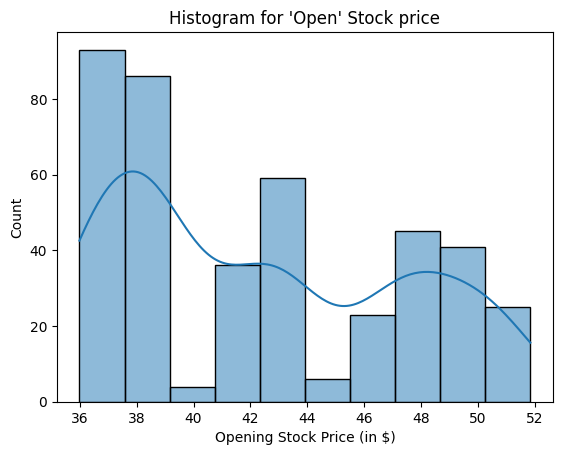

In [14]:
#plotting histogram to get an overview of open stock price
ax=sns.histplot(stock_data, x=stock_data['Open'], kde=True)
ax.set(xlabel='Opening Stock Price (in $)', ylabel='Count', title="Histogram for 'Open' Stock price")
plt.show()

* The 'Open' stock price shows three distint peaks.
* The most common Open stock price with highest peak is around ~36-38 dollars, followed by next peak at around ~43 dollars, followed by third peak at around ~48-50 dollars.

#### **1b) Histogram with Sentiment Classes**

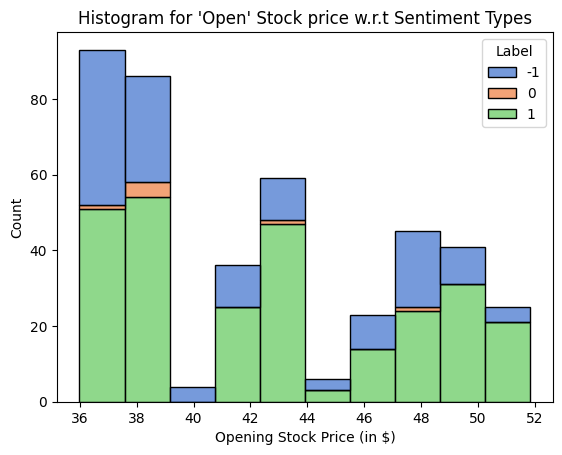

In [15]:
#plotting histogram with hue as lebel to get an overview of open stock price w.r.t sentiment category
ax=sns.histplot(stock_data, x=stock_data['Open'], hue="Label", multiple="stack", palette="muted")
ax.set(xlabel='Opening Stock Price (in $)', ylabel='Count', title="Histogram for 'Open' Stock price w.r.t Sentiment Types")
plt.show()

* Across various values of 'Open' stock price, the positive sentiment (Label=1) records are in majority, while the neutral sentiment (Label=0) records are in minority.
* In other words, dataset has imbalanced class distribution.
* The number of negative sentiment records are slightly less than the number of positive sentiment records.  

#### **1c) Box and Whisker Plot**

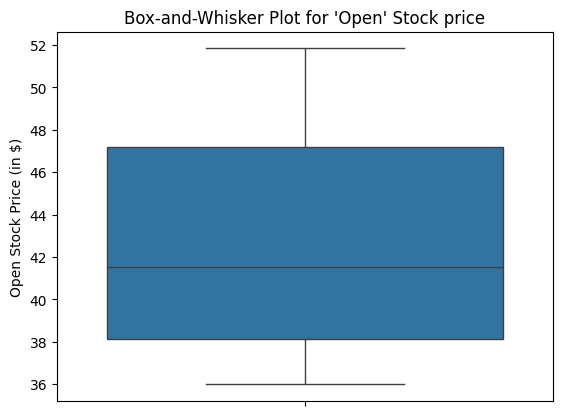

In [16]:
#plotting box-and-whisker plot to see the distribution of Open Stock prices and identify any outliers
ax=sns.boxplot(stock_data, y=stock_data['Open'])
ax.set(ylabel='Open Stock Price (in $)', title="Box-and-Whisker Plot for 'Open' Stock price")
plt.show()

* The min, max and the Q1, Q2, Q3 values confirm to the values in descriptive statistics.
* There are no outliers in the data.

### **2. Univariate Analysis Plots for 'High' Stock Price**

In the following plots (2a to 2c), the univariate analysis of 'High' Stock price is done via plotting. In particular, *histogram and box-and-whisker plots* are drawn using the seaborn library, and key insights are drawn from the plots.

#### **2a) Histogram**

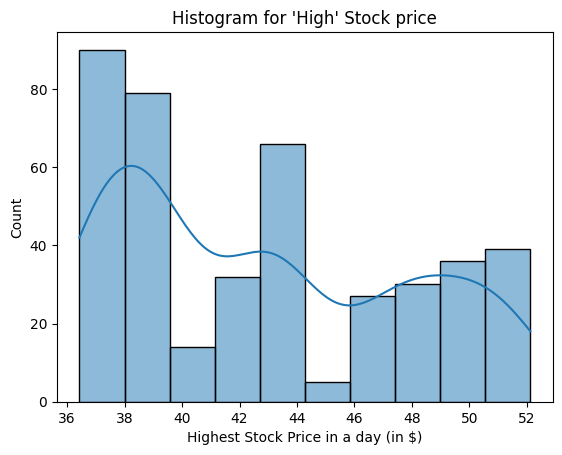

In [17]:
#plotting histogram to get an overview of High stock price
ax=sns.histplot(stock_data, x=stock_data['High'], kde=True)
ax.set(xlabel='Highest Stock Price in a day (in $)', ylabel='Count', title="Histogram for 'High' Stock price")
plt.show()

* The histogram shows three peaks for the distribution of 'Highest' stock price in a day.
* The highest peak with maximum number of records is at ~37 dollars, followed by next peak at ~43-44 dollars, followed by next peak at ~50-52 dollars.

#### **2b) Histogram with Sentiment Classes**

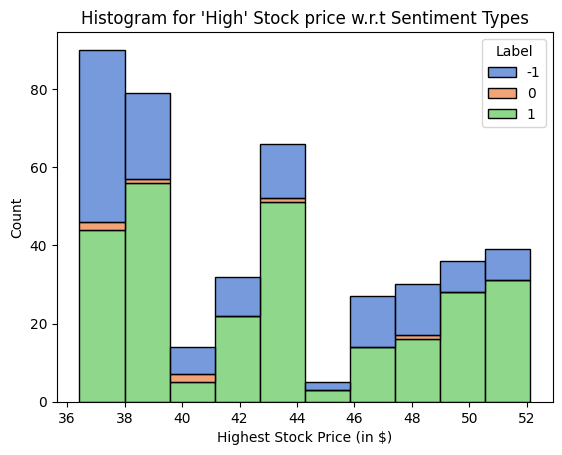

In [18]:
#plotting histogram with hue as label to get an overview of high stock price w.r.t sentiment category
ax=sns.histplot(stock_data, x=stock_data['High'], hue="Label", multiple="stack", palette="muted")
ax.set(xlabel='Highest Stock Price (in $)', ylabel='Count', title="Histogram for 'High' Stock price w.r.t Sentiment Types")
plt.show()

* Across various values of 'High' stock price, the positive sentiment (Label=1) records are in majority, while the neutral sentiment (Label=0) records are in minority.
* The negative sentiment records are slightly less than positive sentiments across various values of Highest stock price.  

#### **2c) Box and Whisker Plot**

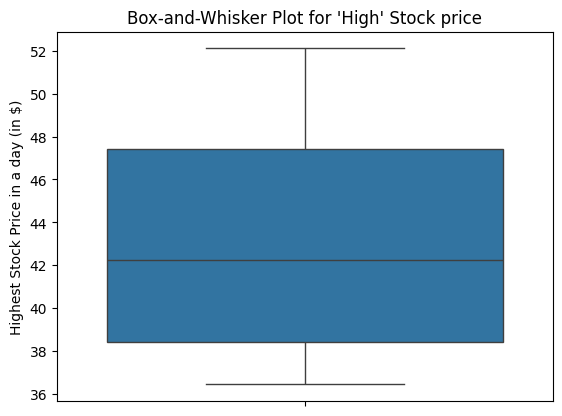

In [19]:
#plotting box-and-whisker plot to see the distribution of High Stock prices and identify any outliers
ax=sns.boxplot(stock_data, y=stock_data['High'])
ax.set(ylabel='Highest Stock Price in a day (in $)', title="Box-and-Whisker Plot for 'High' Stock price")
plt.show()

* The min, max and the Q1, Q2, Q3 values confirm to the values in descriptive statistics dataframe.
* There are no outliers in the data.

### **3. Univariate Analysis for 'Low' Stock Price**

In the following plots (3a to 3c), the univariate analysis of 'Low' Stock price is done via plotting. In particular, histogram and box-and-whisker plots are drawn using the seaborn library, and key insights are drawn from the plots.

#### **3a) Histogram**

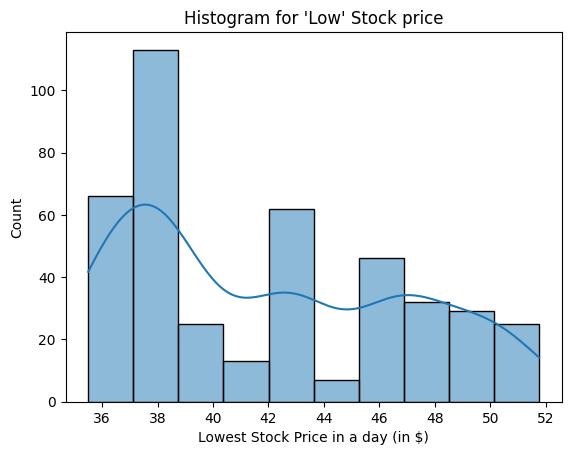

In [20]:
#plotting histogram to get an overview of Low stock price
ax=sns.histplot(stock_data, x=stock_data['Low'], kde=True)
ax.set(xlabel='Lowest Stock Price in a day (in $)', ylabel='Count', title="Histogram for 'Low' Stock price")
plt.show()

* The histogram shows three peaks for the distribution of 'Lowest' stock price in a day.
* For maximum number of times the lowest stock price is observed at ~38 dollars, then the next peak for lowest stock price is observed at ~43 dollars, and then the next peak for lowest stock price is observed at ~46 dollars.

#### **3b) Histogram with Sentiment Classes**

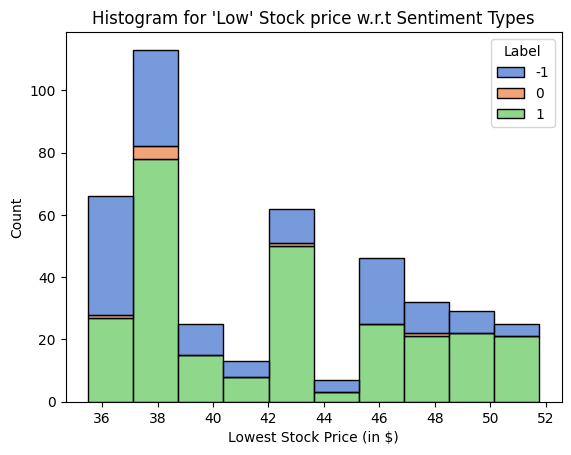

In [21]:
#plotting histogram with label as hue to get an overview of low stock price w.r.t sentiment category
ax=sns.histplot(stock_data, x=stock_data['Low'], hue="Label", multiple="stack", palette="muted")
ax.set(xlabel='Lowest Stock Price (in $)', ylabel='Count', title="Histogram for 'Low' Stock price w.r.t Sentiment Types")
plt.show()

* Across various values of 'Low' stock price, the positive sentiment (Label=1) records are in majority, while the neutral sentiment (Label=0) records are in minority.
* The negative sentiment records are slightly less than positive sentiments across various values of Lowest stock price.

#### **3c) Box and Whisker Plot**

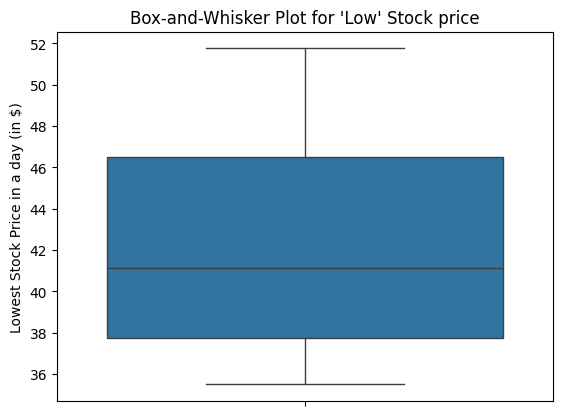

In [22]:
#plotting box-and-whisker plot to see the distribution of Low Stock prices and identify any outliers
ax=sns.boxplot(stock_data, y=stock_data['Low'])
ax.set(ylabel='Lowest Stock Price in a day (in $)', title="Box-and-Whisker Plot for 'Low' Stock price")
plt.show()

* The Lowest stock price in a day varies from ~35-52 dollars as seen in the descriptive statistics values
* The average value for Low stock price is around ~41 dollars.

### **4. Univariate Analysis of 'Close' Stock Price**

In the following plots (4a to 4c), the univariate analysis of 'Close' Stock price is done via plotting. In particular, *histogram and box-and-whisker plots* are drawn using the seaborn library, and key insights are drawn from the plots.

#### **4a) Histogram**

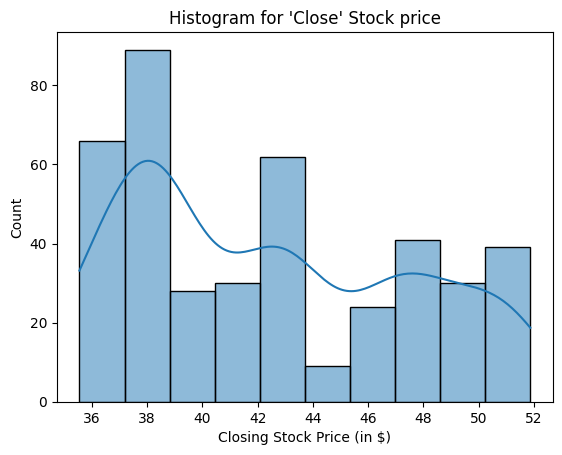

In [23]:
#plotting histogram to get an overview of Low stock price
ax=sns.histplot(stock_data, x=stock_data['Close'], kde=True)
ax.set(xlabel='Closing Stock Price (in $)', ylabel='Count', title="Histogram for 'Close' Stock price")
plt.show()

* The histogram shows three peaks for the distribution of 'Closing' stock price.
* For maximum number of times the closing stock price is observed at ~38 dollars, then the next peak for closing stock price is observed at ~43 dollars, and then the next peak for closing stock price peak is observed at ~48 dollars.

#### **4b) Histogram with Sentiment Classes**

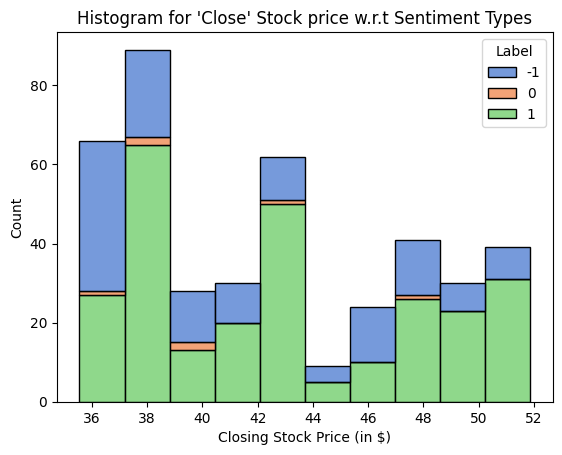

In [24]:
#plotting histogram with hue as lebel to get an overview of close stock price w.r.t sentiment category
ax=sns.histplot(stock_data, x=stock_data['Close'], hue="Label", multiple="stack", palette="muted")
ax.set(xlabel='Closing Stock Price (in $)', ylabel='Count', title="Histogram for 'Close' Stock price w.r.t Sentiment Types")
plt.show()

* Across various values of 'Close' stock price, the positive sentiment (Label=1) records are in majority, while the neutral sentiment (Label=0) records are in minority.
* The number of negative sentiment records are slightly less than the number of positive sentiment records.

#### **4c) Box and Whisker Plot**

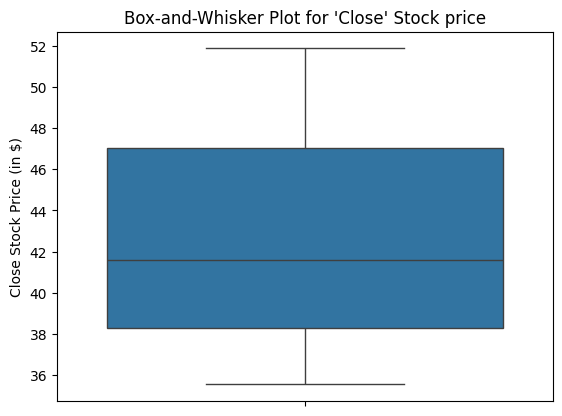

In [25]:
#plotting box-and-whisker plot to see the distribution of Close Stock prices and identify any outliers
ax=sns.boxplot(stock_data, y=stock_data['Close'])
ax.set(ylabel='Close Stock Price (in $)', title="Box-and-Whisker Plot for 'Close' Stock price")
plt.show()

* The min, max and the Q1, Q2, Q3 values for Close stock price confirm to the values in descriptive statistics.
* There are no outliers in the data.

### **5. Univariate Analysis of Stocks 'Volume'**

In the following plots (5a to 5c), the univariate analysis of 'Volume' of stocks traded is done via plotting. In particular, *histogram and box-and-whisker plots* are drawn using the seaborn library, and key insights are drawn from the plots.

#### **5a) Histogram**

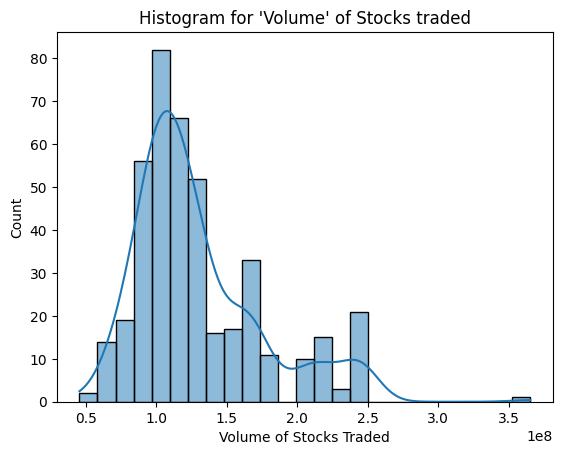

In [26]:
#plotting histogram to get an overview of stocks traded Volume
ax=sns.histplot(stock_data, x=stock_data['Volume'], kde=True)
ax.set(xlabel='Volume of Stocks Traded', ylabel='Count', title="Histogram for 'Volume' of Stocks traded")
plt.show()

* Histogram shows a single peak at ~1x1e8 i.e., majority of stocks Volume is around 1x10e8

#### **5b) Histogram with Sentiment Classes**

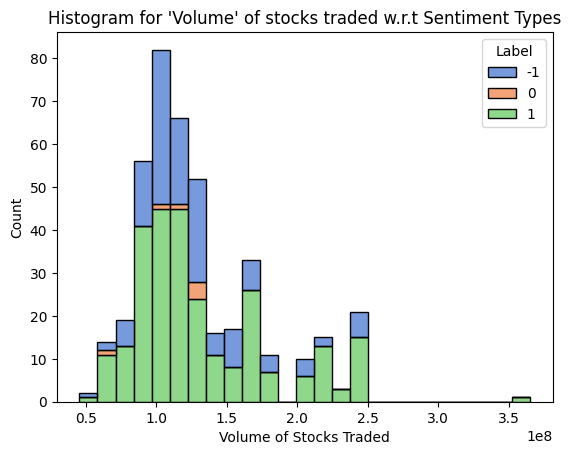

In [27]:
#plotting histogram with hue as lebel to get an overview of stocks Volume w.r.t sentiment category
ax=sns.histplot(stock_data, x=stock_data['Volume'], hue="Label", multiple="stack", palette="muted")
ax.set(xlabel='Volume of Stocks Traded', ylabel='Count', title="Histogram for 'Volume' of stocks traded w.r.t Sentiment Types")
plt.show()

* Across various values of 'Volume' of stocks traded, the positive sentiment (Label=1) records are in majority, while the neutral sentiment (Label=0) records are in minority.
* In other words, dataset has imbalanced class distribution.
* The number of negative sentiment records are slightly less than the number of positive sentiment records.  

#### **5c) Box and Whisker Plot**

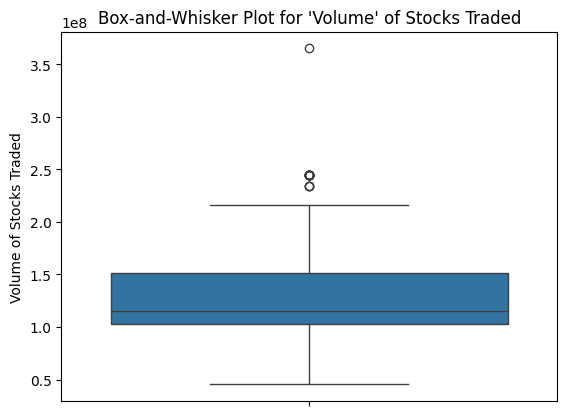

In [28]:
#plotting box-and-whisker plot to see the distribution of Volume of Stocks traded and identify any outliers
ax=sns.boxplot(stock_data, y=stock_data['Volume'])
ax.set(ylabel='Volume of Stocks Traded', title="Box-and-Whisker Plot for 'Volume' of Stocks Traded")
plt.show()

* The Volume of stocks traded is distributed in the range of ~05x10e8 to ~2.2x10e8
* This plot shows there are few outliers in the data.

### **6. Univariate Analysis of Sentiment 'Label'**

The categorical column 'Label' is analyzed using the *countplot* as shown in the plot 6a and key insights are drawn.

#### **6a) CountPlot**

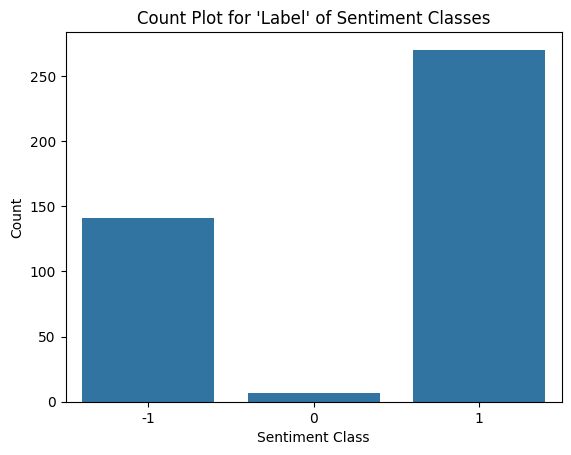

In [29]:
#plotting count plot to see the distribution of varies sentiment classes in the dataset
ax=sns.countplot(stock_data, x=stock_data['Label'])
ax.set(ylabel='Count', xlabel='Sentiment Class', title="Count Plot for 'Label' of Sentiment Classes")
plt.show()



* This plot shows the imbalanced class distribution in the dataset.
* Majority class is the positive sentiment class with more than ~250 records.
* Minority class is the neutral sentiment class with only ~tens of records.
* The negative sentiment class has fewer records than majority class and more records than minority class.

### **7. Univariate Analysis of 'News Length' distribution**

To analyze the length of news content, its distribution is plotted via *histogram and box plots* in plots 7a and 7b and key insights are drawn.

In [30]:
# computing the length of News column by counting the number of words in each news content
stock_data['news_len'] = stock_data['News'].apply(lambda x: len(x.split(' ')))

#### **Descriptive Statistics for News Length**

In [31]:
stock_data['news_len'].describe()

,news_len
count,418.000000
mean,525.662679
std,303.584080
min,44.000000
25%,304.250000
50%,480.000000
75%,700.500000
max,2142.000000


#### **7a) Histogram**

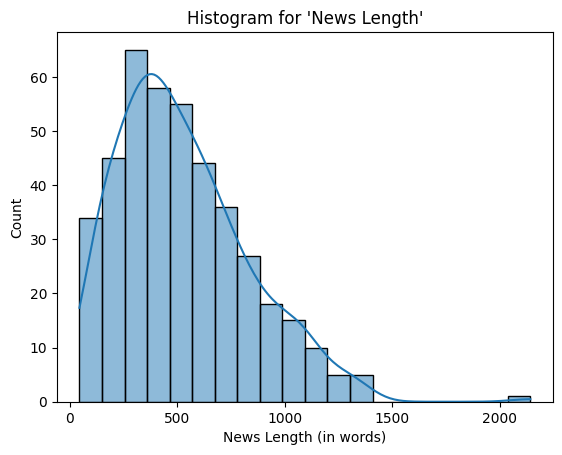

In [32]:
#plotting histogram to get an overview of distribution of length of news content
ax=sns.histplot(stock_data['news_len'], kde=True)
ax.set(xlabel='News Length (in words)', ylabel='Count', title="Histogram for 'News Length'")
plt.show()

* The histogram shows that majority of news have their length around ~300-500 words, identified by the peak at around ~300-500 words in news content.
* The histogram also shows a tail on the right side, showing that very few news have longer content length (more then ~2000 words) also.

#### **7b) BoxPlot**
Plotting the distribution of news length using box plot.

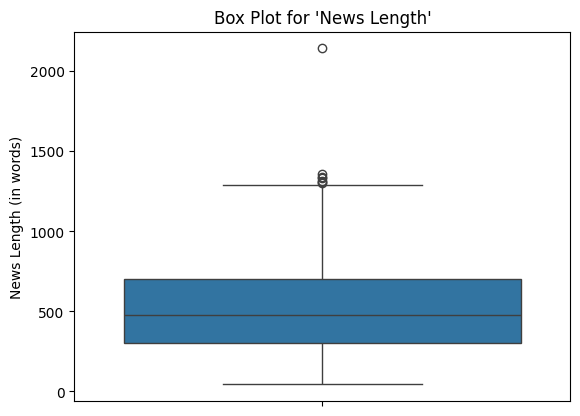

In [33]:
#plotting boxplot to get an overview of distribution of news length
ax=sns.boxplot(y=stock_data['news_len'])
ax.set(ylabel='News Length (in words)', title="Box Plot for 'News Length'")
plt.show()

* The average news length is around ~500 words.
* The news length is distributed in the range of ~40 to ~1300 wordss, with few news having longer length.
* The min, max, Q1, Q2, Q3 values confirm to the descriptive statistics of news length.

### **B. Bivariate Analysis**

* Correlation
* Sentiment Polarity vs Price
* Date vs Price

**Note**: The above points are listed to provide guidance on how to approach bivariate analysis. Analysis has to be done beyond the above listed points to get maximum scores.

#### **Note:** I have done the Bivariate Analysis in following ways:


1.   **Correlation Analysis**
2.   **Semantic Polarity vs Price**
3.   **Date vs Price**
4.   **Date vs Volume**
5.   **Sentiment Label vs Volume**
6.   **Sentiment Label vs News Length**



### **1. Correlation Analysis**
Correlation among variables is inferred by the scatterplot as shown below.

#### **1a) Correlation via PairPlot**

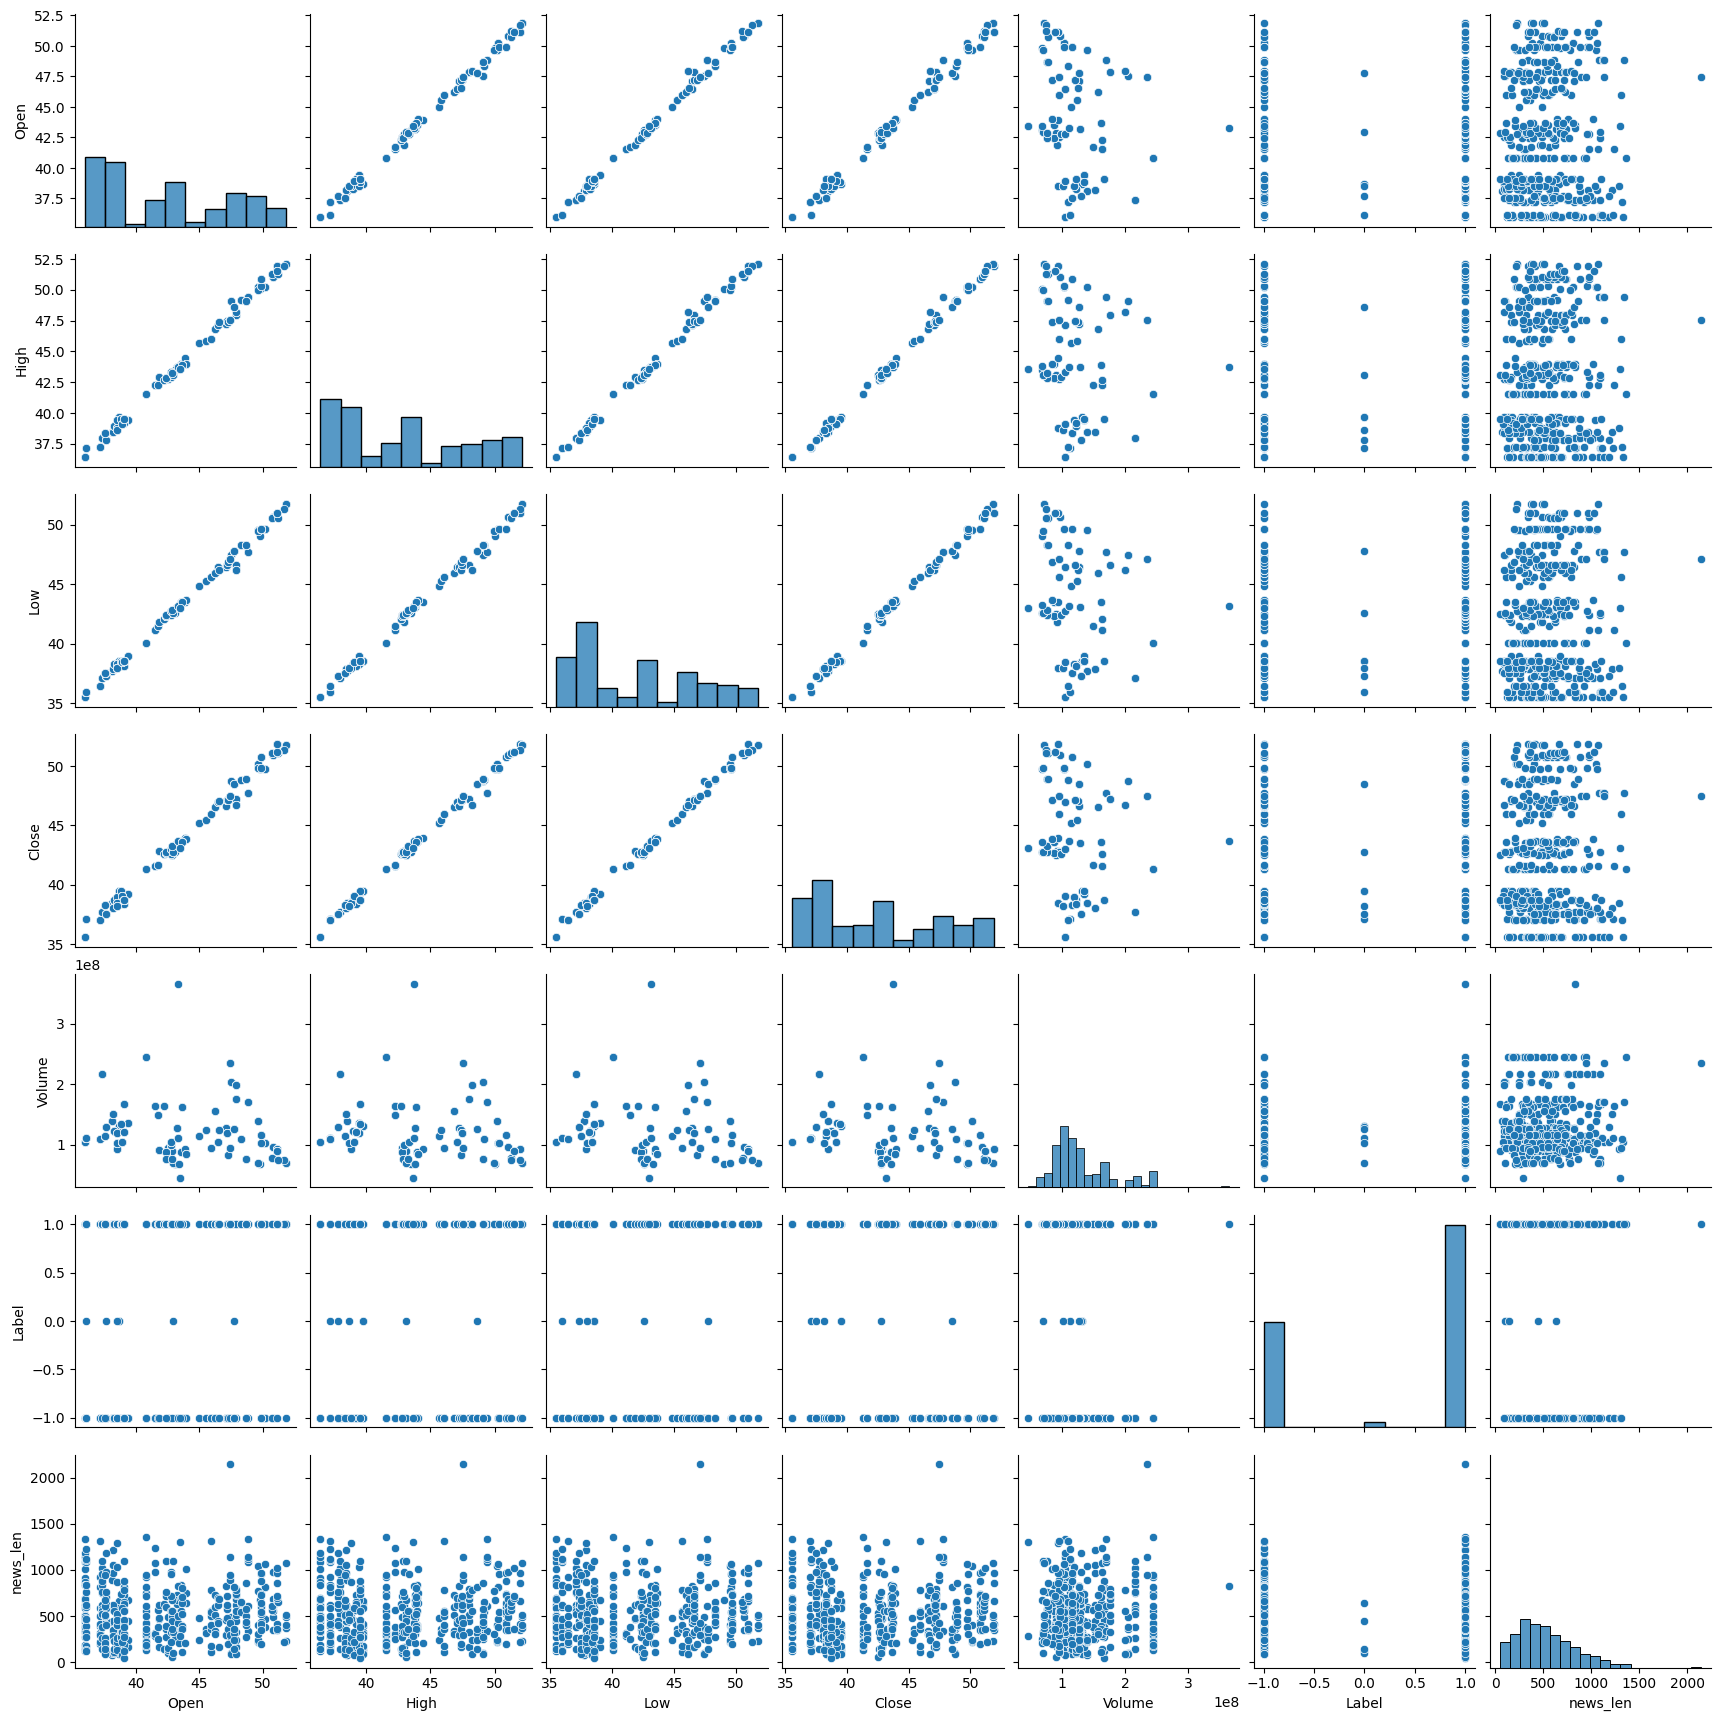

In [34]:
#pairplot to see correlation among variables in the dataset
sns.pairplot(stock_data)

* The pairplot shows a high correlation among pairs of open, high, low, and close stock price columns.
* The Volume column is not correlated with any other column.
* The Label column is a categorical column with three distinct values -1, 0, 1

#### **1b) Correlation via PairPlot with Sentiment Classes**

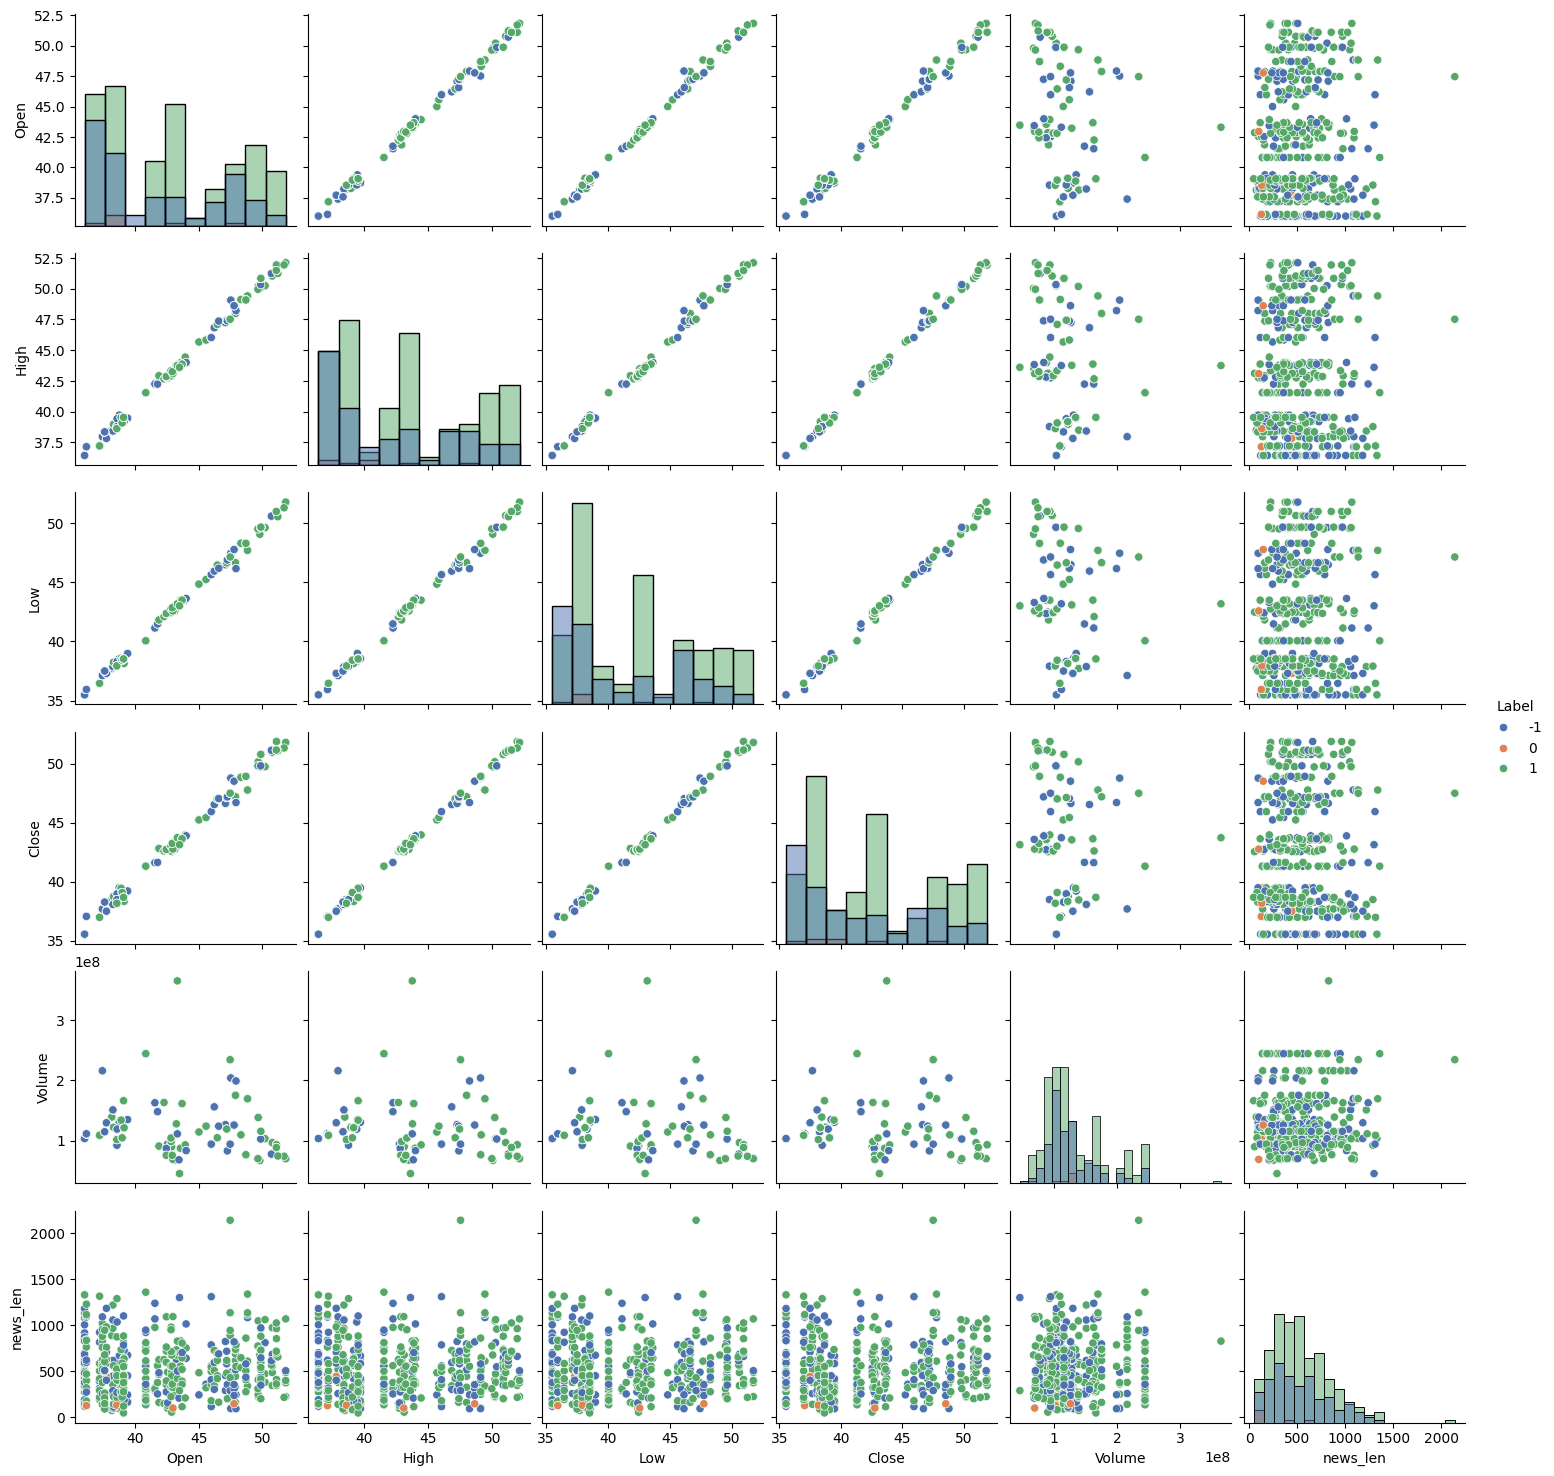

In [35]:
sns.pairplot(stock_data, hue="Label", diag_kind="hist", palette="deep")

* The column pairs of open, high, low, close stock price are highly correlated.
* The neutral sentiment records are in minority.
* The negative sentiment records are less than positive sentiment records.

### **2. Sentiment Polarity vs Price**
Plotting for Sentiment Class vs 4 Types of Stocks price: Open, High, Low, and Close is done in the 4 subplots below.

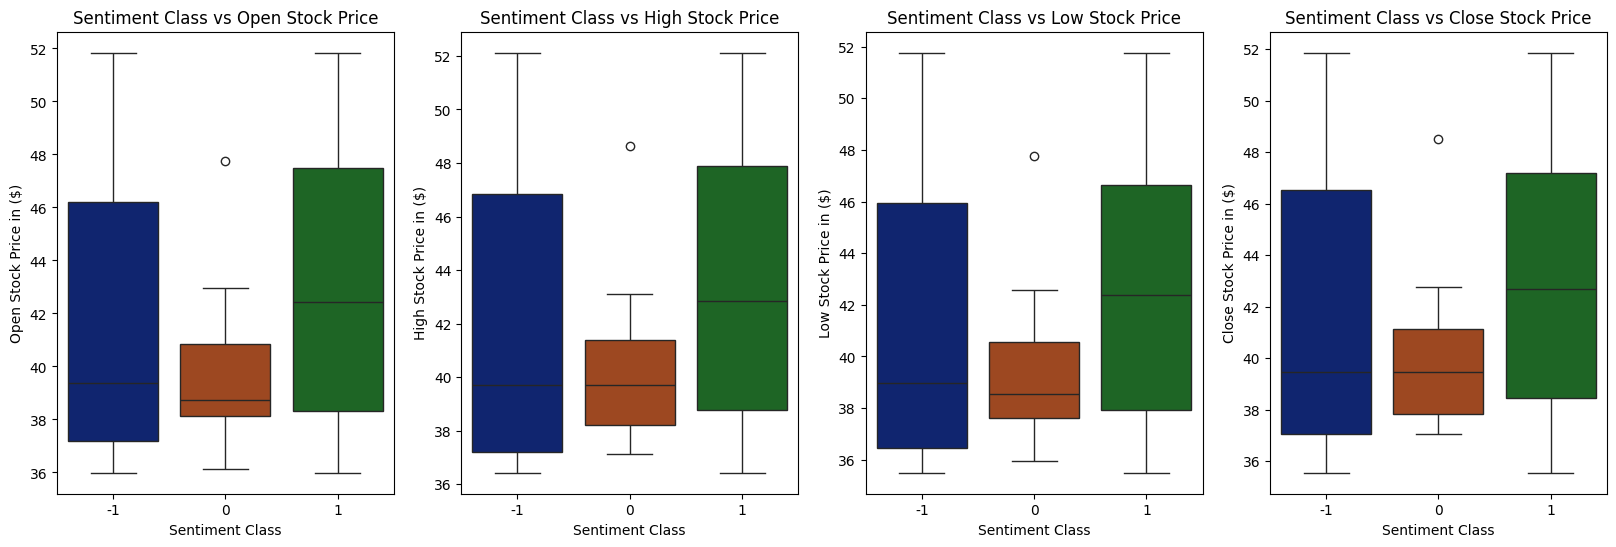

In [36]:
# Create a figure and a set of subplots
fig, axes = plt.subplots(1, 4, figsize=(20, 6)) # 1 row, 4 columns

# Plotting Sentiment Class vs Open stock price on the first subplot
sns.boxplot(x=stock_data['Label'], y=stock_data['Open'], palette='dark', ax=axes[0])
axes[0].set_title('Sentiment Class vs Open Stock Price')
axes[0].set_xlabel('Sentiment Class')
axes[0].set_ylabel('Open Stock Price in ($)')

# Plotting Sentiment Class vs High stock price on the second subplot
sns.boxplot(x=stock_data['Label'], y=stock_data['High'], palette='dark', ax=axes[1])
axes[1].set_title('Sentiment Class vs High Stock Price')
axes[1].set_xlabel('Sentiment Class')
axes[1].set_ylabel('High Stock Price in ($)')

# Plotting Sentiment Class vs Low stock price on the third subplot
sns.boxplot(x=stock_data['Label'], y=stock_data['Low'], palette='dark', ax=axes[2])
axes[2].set_title('Sentiment Class vs Low Stock Price')
axes[2].set_xlabel('Sentiment Class')
axes[2].set_ylabel('Low Stock Price in ($)')

# Plotting Sentiment Class vs Close stock price on the fourth subplot
sns.boxplot(x=stock_data['Label'], y=stock_data['Close'], palette='dark', ax=axes[3])
axes[3].set_title('Sentiment Class vs Close Stock Price')
axes[3].set_xlabel('Sentiment Class')
axes[3].set_ylabel('Close Stock Price in ($)')


# plot display
plt.show()

* Both, the positive and negative sentiment stocks have all 4 stock prices (open, high, low, and close) distributed in a wider range from ~36-52 dollars, while for the neutral stocks', the four types of stocks price is distributed in a narrower range from ~37-43 dollars
* The average stock prices for positive sentiment stocks is higher ~43 dollars for all stock prices: open, high, low, and close than the corresponding average prices for negative stocks ~39 dollars.
* The average prices for neutral sentiment class is close to ~38-39 dollars.
* There is a slight difference in average stock prices for negative class than the corresponding stock prices of neutral class.
* There is one outlier w.r.t neutral sentiment class.

### **3. Date vs Price**


#### **Plotting Date vs Stocks Price (Open, High, Low, and Close) is done in the 4 Subplots Below**

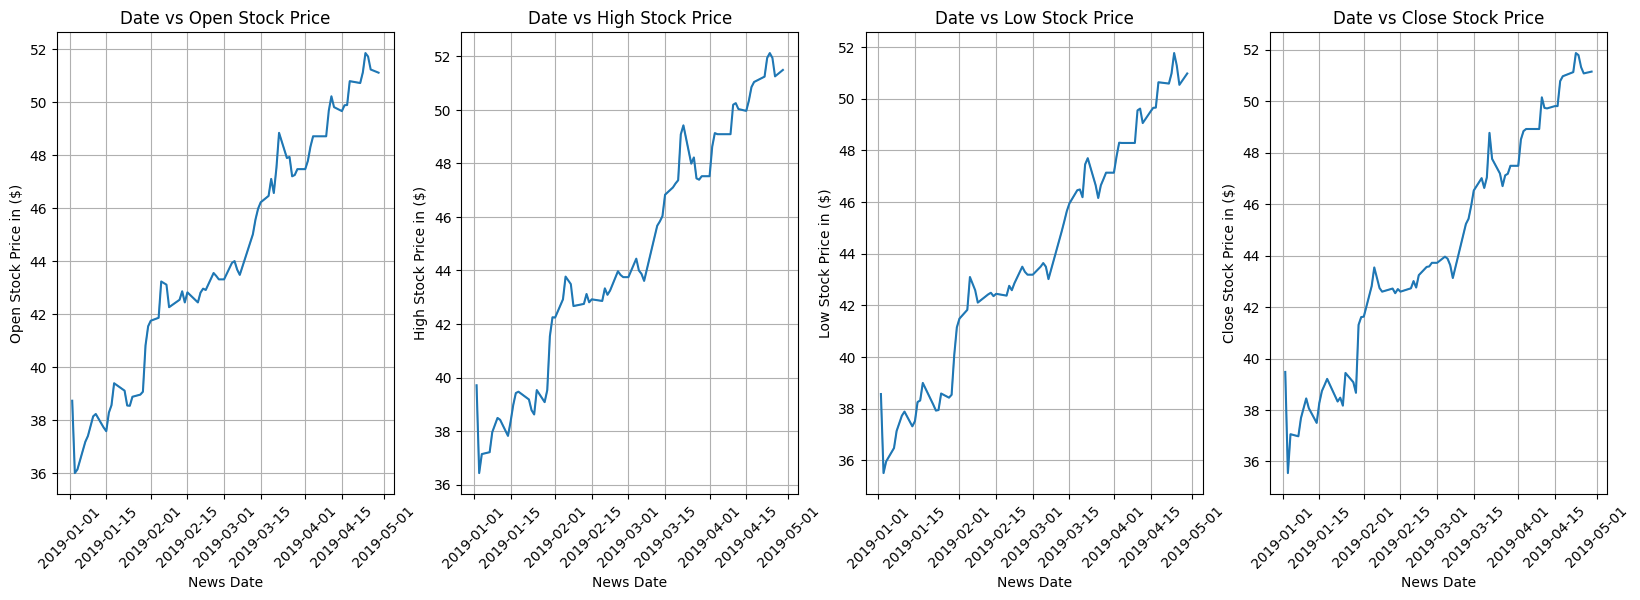

In [37]:
# Create a figure and a set of subplots
fig, axes = plt.subplots(1, 4, figsize=(20, 6)) # 1 row, 4 columns

# Plotting Open stock price vs Date on the first subplot
sns.lineplot(x=stock_data['Date'], y=stock_data['Open'], ax=axes[0])
axes[0].set_title('Date vs Open Stock Price')
axes[0].set_xlabel('News Date')
axes[0].set_ylabel('Open Stock Price in ($)')
#rotating date labels for better visualization
axes[0].tick_params(axis='x', rotation=45)
#adding grid lines in the subplot
axes[0].grid(True)

# Plotting High stock price vs Date on the second subplot
sns.lineplot(x=stock_data['Date'], y=stock_data['High'], ax=axes[1])
axes[1].set_title('Date vs High Stock Price')
axes[1].set_xlabel('News Date')
axes[1].set_ylabel('High Stock Price in ($)')
#rotating date labels for better visualization
axes[1].tick_params(axis='x', rotation=45)
#adding grid lines in the subplot
axes[1].grid(True)

# Plotting Low stock price vs Date on the third subplot
sns.lineplot(x=stock_data['Date'], y=stock_data['Low'], ax=axes[2])
axes[2].set_title('Date vs Low Stock Price')
axes[2].set_xlabel('News Date')
axes[2].set_ylabel('Low Stock Price in ($)')
#rotating date labels for better visualization
axes[2].tick_params(axis='x', rotation=45)
#adding grid lines in the subplot
axes[2].grid(True)

# Plotting Close stock price vs Date on the fourth subplot
sns.lineplot(x=stock_data['Date'], y=stock_data['Close'], ax=axes[3])
axes[3].set_title('Date vs Close Stock Price')
axes[3].set_xlabel('News Date')
axes[3].set_ylabel('Close Stock Price in ($)')
#rotating date labels for better visualization
axes[3].tick_params(axis='x', rotation=45)
#adding grid lines in the subplot
axes[3].grid(True)


# plot display
plt.show()

* Over the period from Jan 2019 to May 2019, an incresing trend is seen in all the four stock prices: Open, High, Low, and Close.
* All the four stock prices increased from ~39 dollars to ~52 dollars over a period of 5 months.
* One dip in seen in all four stock prices at around ~6-7 March 2019
* Three spikes are seen in all four stock prices at following dates: first week of Feb ~5 Feb 2019, last week of March ~31 March 2019, and third week of April ~23 April 2019.

### **4. Date vs Volume**
The analysis of News Date vs Volume of stocks traded is done below.

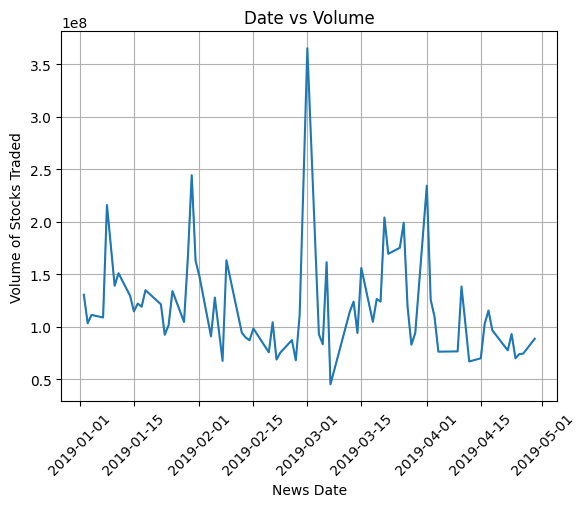

In [38]:
# Plotting Date vs Volume to analyze the trend of stocks sale over News Dates
ax=sns.lineplot(x=stock_data['Date'], y=stock_data['Volume'])
ax.set_title('Date vs Volume')
ax.set_xlabel('News Date')
ax.set_ylabel('Volume of Stocks Traded')
#rotating date labels for better visualization
ax.tick_params(axis='x', rotation=45)
#adding grid lines in the plot
plt.grid(True)
plt.show()


* A sharp peak i.e., increase in Volume of stocks traded is seen on 1 March 2019, it may be due to some positive sentiment news around those dates or exceptionally, it might be an outlier.
* The Volume of stocks traded over time shows fluctuations w.r.t news Dates. It indicates the *News sentiments impact the Volume of Stocks traded*

### **5. Sentiment Label vs Volume**
Plotting of Sentiment Class vs Volume of stocks traded is done below.

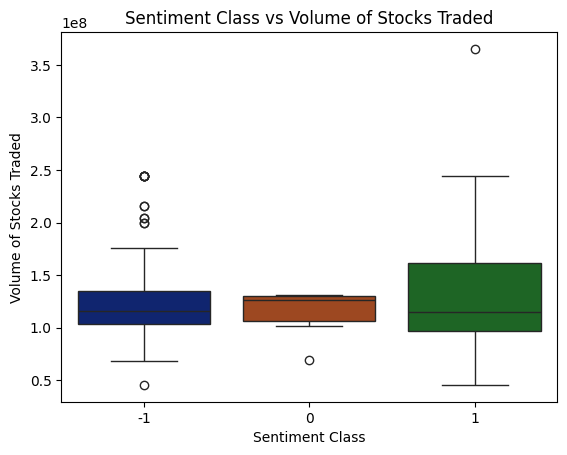

In [39]:
# Plotting Sentiment Class vs Volume
ax=sns.boxplot(x=stock_data['Label'], y=stock_data['Volume'], palette='dark')
ax.set_title('Sentiment Class vs Volume of Stocks Traded')
ax.set_xlabel('Sentiment Class')
ax.set_ylabel('Volume of Stocks Traded')

# plot display
plt.show()

* The Volume of stocks traded is widest for positive sentiment followed by negative sentiment volumes, followed by neutral sentiment volumes. In other words, the +ve sentiment of news resulted in more volume of stocks traded.
* The average volume of stocks traded for positive and sentiment is nearly same at around ~1.2x10e8, and for neutral sentiment stocks is slightly higher ~1.3x10e8
* Few points may be outliers or actual business cases, where the higher volume of stocks was traded.

### **6. Sentiment Label vs News Length**
Plotting the distribution of news length for various sentiment types using boxplot below.

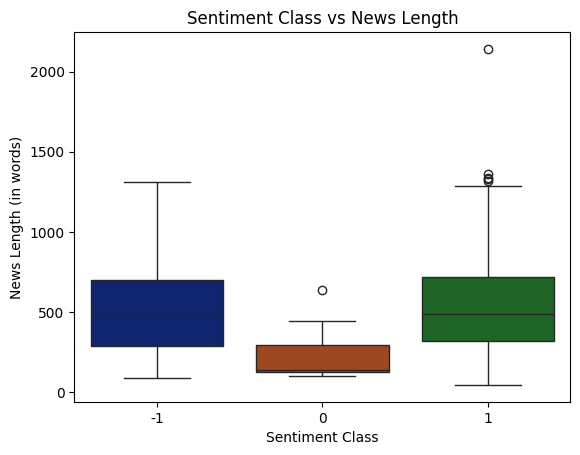

In [40]:
#plotting boxplot to get an overview of distribution of news length w.r.t Sentiment Classes
ax=sns.boxplot(x=stock_data['Label'], y=stock_data['news_len'], palette='dark')
ax.set(xlabel='Sentiment Class', ylabel='News Length (in words)', title="Sentiment Class vs News Length")
plt.show()

* The news length for both, positive and negative sentiment classes is nearly same form ~50s to ~1300 words.
* Both, the positive and negative sentiment news have shorter as well as longer lengths, while the neutral sentiment news has shorter lengths in the range of ~50 - ~500 words.
* Few positive sentiment news have exceptionally longer lengths, more than 1300 words.  

## **IV. Data Preprocessing**
Data pre-processing involves:
1.  *Feature Scaling*
2.  *News text Pre-Processing*
3.  *Train-Test Splitting*

### **1. Feature Scaling**
For feature scaling, we are using **Min-Max Scaler for stock prices** (open, high, low, and close) and using **RobustScaler for stock Volume**.

In [41]:
# Stock prices do not have outliers and have min-max ranges, so applying min-max scaler for stock prices
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
stock_data['Open'] = min_max_scaler.fit_transform(stock_data[['Open']])
stock_data['High'] = min_max_scaler.fit_transform(stock_data[['High']])
stock_data['Low'] = min_max_scaler.fit_transform(stock_data[['Low']])
stock_data['Close'] = min_max_scaler.fit_transform(stock_data[['Close']])

#printing 5 records to see the scaled values
stock_data.head()


,Date,News,Open,High,Low,Close,Volume,Label,news_len
0,2019-01-02,The dollar minutes ago tumbled to 106 67 from above 109 a few trades earlier It s since bounced a hair to 107 16 FXY 3 6 after hoursAlongside money poured into U S government paper with the 10 year Treasury yield sliding a few more basis points to 2 61 TLT 0 7 after hour Both moves come following Apple NASDAQ AAPL s revenue warning which sent its shares and U S stock index futures into the red Apple s currently off 7 5 and the QQQs 2 2 ETFs TLT TBT TMV FXY YCS TBF EDV TMF TTT ZROZ VGLT OTC JYN TLH UBT SPTL YCL DLBS VUSTX TYBS DLBL OLD DJPY OPER UJPYNow read,0.17224,0.20905,0.188192,0.240809,130672400,1,161
1,2019-01-02,By Wayne Cole and Swati Pandey SYDNEY Reuters The Japanese yen soared in early Asian trading on Thursday as the break of key technical levels triggered massive stop loss sales of the U S and Australian dollars in very thin markets The dollar collapsed to as low as 105 25 yen on Reuters dealing a drop of 3 2 percent from the opening 108 76 and the lowest reading since March 2018 It was last trading around 107 50 yen Analysts said the rot began when tech bellwether Apple Inc O AAPL shocked investors by cutting its earnings guidance citing sluggish iPhone sales in China The news sent U S stock futures sliding and sparked a rush of funds to safe haven bonds With risk aversion high the safe haven yen was propelled through major technical levels and triggered massive stop loss flows from investors who have been short of the yen for months The move was exacerbated by a dearth of liquidity with Japan still on holiday after the New Year and by automated algorithmic trades which are carried out by computers in micro seconds Most major currencies simply collapsed against the yen in a matter of seconds Looks like we had a flash crash said Ray Attrill head of FX strategy at National Australia Bank One theory is that may be Japanese retail FX players are forcing out of AUDJPY which is creating a liquidity vacuum he added This is a market dislocation rather than a fundamental event The Australian dollar tumbled to as low as 72 26 yen AUDJPY D3 on Reuters dealing a level not seen since late 2011 having started around 75 21 It was last changing hands at 73 72 yen The Aussie in turn sank against the U S dollar to as far as 0 6715 the lowest since March 2009 having started around 0 6984 It was last trading at 0 6888 \nOther currencies smashed against the yen included the euro sterling and the Turkish lira,0.17224,0.20905,0.188192,0.240809,130672400,-1,385
2,2019-01-02,By Stephen Culp NEW YORK Reuters Wall Street edged higher on Wednesday after stumbling out of the starting gate on the first trading day of 2019 while fears of a global economic slowdown were exacerbated after Apple cut its holiday quarter revenue forecast Apple O AAPL dropped 8 percent in extended trading late in the day after the iPhone maker slashed its outlook for the December quarter blaming weak demand in China Shares of Apple s suppliers also fell and S P 500 futures dropped 1 3 percent signaling that Wednesday s modest advance could unwind when the market reopens on Thursday To see Apple s sales drop off this much says something about the Chinese economy said Tim Ghriskey chief investment strategist at Inverness Counsel in New York Any company that does business in China will feel the impact of this Stocks had started the session lower after separate reports showed a deceleration in factory activity in China and the euro zone indicating the ongoing trade dispute between the United States and China was taking a toll on global manufacturing Energy SPNY stocks led the S P 500 s advance and the sector was the index s biggest percentage gainer buoyed by a 2 4 percent jump in crude prices The group was the worst performing S P sector in 2018 Gains were offset by healthcare SPXHC and so called defensive sectors such as real estate utilities SPLRCU and consumer staples SPLRCS Healthcare companies provi

In [42]:
# Stock Volumes had outliers, which may reflect actual business events, so applying robust scaler for stock Volume and news_len, which will scale its values w.r.t median and other statistical features
from sklearn.preprocessing import RobustScaler
robust_scaler = RobustScaler()
stock_data['Volume'] = robust_scaler.fit_transform(stock_data[['Volume']])


#printing 5 records to see the scaled values of Volume
stock_data.head()

,Date,News,Open,High,Low,Close,Volume,Label,news_len
0,2019-01-02,The dollar minutes ago tumbled to 106 67 from above 109 a few trades earlier It s since bounced a hair to 107 16 FXY 3 6 after hoursAlongside money poured into U S government paper with the 10 year Treasury yield sliding a few more basis points to 2 61 TLT 0 7 after hour Both moves come following Apple NASDAQ AAPL s revenue warning which sent its shares and U S stock index futures into the red Apple s currently off 7 5 and the QQQs 2 2 ETFs TLT TBT TMV FXY YCS TBF EDV TMF TTT ZROZ VGLT OTC JYN TLH UBT SPTL YCL DLBS VUSTX TYBS DLBL OLD DJPY OPER UJPYNow read,0.17224,0.20905,0.188192,0.240809,0.312025,1,161
1,2019-01-02,By Wayne Cole and Swati Pandey SYDNEY Reuters The Japanese yen soared in early Asian trading on Thursday as the break of key technical levels triggered massive stop loss sales of the U S and Australian dollars in very thin markets The dollar collapsed to as low as 105 25 yen on Reuters dealing a drop of 3 2 percent from the opening 108 76 and the lowest reading since March 2018 It was last trading around 107 50 yen Analysts said the rot began when tech bellwether Apple Inc O AAPL shocked investors by cutting its earnings guidance citing sluggish iPhone sales in China The news sent U S stock futures sliding and sparked a rush of funds to safe haven bonds With risk aversion high the safe haven yen was propelled through major technical levels and triggered massive stop loss flows from investors who have been short of the yen for months The move was exacerbated by a dearth of liquidity with Japan still on holiday after the New Year and by automated algorithmic trades which are carried out by computers in micro seconds Most major currencies simply collapsed against the yen in a matter of seconds Looks like we had a flash crash said Ray Attrill head of FX strategy at National Australia Bank One theory is that may be Japanese retail FX players are forcing out of AUDJPY which is creating a liquidity vacuum he added This is a market dislocation rather than a fundamental event The Australian dollar tumbled to as low as 72 26 yen AUDJPY D3 on Reuters dealing a level not seen since late 2011 having started around 75 21 It was last changing hands at 73 72 yen The Aussie in turn sank against the U S dollar to as far as 0 6715 the lowest since March 2009 having started around 0 6984 It was last trading at 0 6888 \nOther currencies smashed against the yen included the euro sterling and the Turkish lira,0.17224,0.20905,0.188192,0.240809,0.312025,-1,385
2,2019-01-02,By Stephen Culp NEW YORK Reuters Wall Street edged higher on Wednesday after stumbling out of the starting gate on the first trading day of 2019 while fears of a global economic slowdown were exacerbated after Apple cut its holiday quarter revenue forecast Apple O AAPL dropped 8 percent in extended trading late in the day after the iPhone maker slashed its outlook for the December quarter blaming weak demand in China Shares of Apple s suppliers also fell and S P 500 futures dropped 1 3 percent signaling that Wednesday s modest advance could unwind when the market reopens on Thursday To see Apple s sales drop off this much says something about the Chinese economy said Tim Ghriskey chief investment strategist at Inverness Counsel in New York Any company that does business in China will feel the impact of this Stocks had started the session lower after separate reports showed a deceleration in factory activity in China and the euro zone indicating the ongoing trade dispute between the United States and China was taking a toll on global manufacturing Energy SPNY stocks led the S P 500 s advance and the sector was the index s biggest percentage gainer buoyed by a 2 4 percent jump in crude prices The group was the worst performing S P sector in 2018 Gains were offset by healthcare SPXHC and so called defensive sectors such as real estate utilities SPLRCU and consumer staples SPLRCS Healthcare companies provide

### **2. Text Pre-processing**
Replacing U S with US in the **News** text. Otherwise, it might be treated as two separate tokens instead of one during further processing.

In [43]:
# replacing U S with US in News column
stock_data['News']=stock_data['News'].str.replace('U S', 'US')


In [44]:
#printing 5 records to view news column after pre-processing
stock_data.head(5)

,Date,News,Open,High,Low,Close,Volume,Label,news_len
0,2019-01-02,The dollar minutes ago tumbled to 106 67 from above 109 a few trades earlier It s since bounced a hair to 107 16 FXY 3 6 after hoursAlongside money poured into US government paper with the 10 year Treasury yield sliding a few more basis points to 2 61 TLT 0 7 after hour Both moves come following Apple NASDAQ AAPL s revenue warning which sent its shares and US stock index futures into the red Apple s currently off 7 5 and the QQQs 2 2 ETFs TLT TBT TMV FXY YCS TBF EDV TMF TTT ZROZ VGLT OTC JYN TLH UBT SPTL YCL DLBS VUSTX TYBS DLBL OLD DJPY OPER UJPYNow read,0.17224,0.20905,0.188192,0.240809,0.312025,1,161
1,2019-01-02,By Wayne Cole and Swati Pandey SYDNEY Reuters The Japanese yen soared in early Asian trading on Thursday as the break of key technical levels triggered massive stop loss sales of the US and Australian dollars in very thin markets The dollar collapsed to as low as 105 25 yen on Reuters dealing a drop of 3 2 percent from the opening 108 76 and the lowest reading since March 2018 It was last trading around 107 50 yen Analysts said the rot began when tech bellwether Apple Inc O AAPL shocked investors by cutting its earnings guidance citing sluggish iPhone sales in China The news sent US stock futures sliding and sparked a rush of funds to safe haven bonds With risk aversion high the safe haven yen was propelled through major technical levels and triggered massive stop loss flows from investors who have been short of the yen for months The move was exacerbated by a dearth of liquidity with Japan still on holiday after the New Year and by automated algorithmic trades which are carried out by computers in micro seconds Most major currencies simply collapsed against the yen in a matter of seconds Looks like we had a flash crash said Ray Attrill head of FX strategy at National Australia Bank One theory is that may be Japanese retail FX players are forcing out of AUDJPY which is creating a liquidity vacuum he added This is a market dislocation rather than a fundamental event The Australian dollar tumbled to as low as 72 26 yen AUDJPY D3 on Reuters dealing a level not seen since late 2011 having started around 75 21 It was last changing hands at 73 72 yen The Aussie in turn sank against the US dollar to as far as 0 6715 the lowest since March 2009 having started around 0 6984 It was last trading at 0 6888 \nOther currencies smashed against the yen included the euro sterling and the Turkish lira,0.17224,0.20905,0.188192,0.240809,0.312025,-1,385
2,2019-01-02,By Stephen Culp NEW YORK Reuters Wall Street edged higher on Wednesday after stumbling out of the starting gate on the first trading day of 2019 while fears of a global economic slowdown were exacerbated after Apple cut its holiday quarter revenue forecast Apple O AAPL dropped 8 percent in extended trading late in the day after the iPhone maker slashed its outlook for the December quarter blaming weak demand in China Shares of Apple s suppliers also fell and S P 500 futures dropped 1 3 percent signaling that Wednesday s modest advance could unwind when the market reopens on Thursday To see Apple s sales drop off this much says something about the Chinese economy said Tim Ghriskey chief investment strategist at Inverness Counsel in New York Any company that does business in China will feel the impact of this Stocks had started the session lower after separate reports showed a deceleration in factory activity in China and the euro zone indicating the ongoing trade dispute between the United States and China was taking a toll on global manufacturing Energy SPNY stocks led the S P 500 s advance and the sector was the index s biggest percentage gainer buoyed by a 2 4 percent jump in crude prices The group was the worst performing S P sector in 2018 Gains were offset by healthcare SPXHC and so called defensive sectors such as real estate utilities SPLRCU and consumer staples SPLRCS Healthcare companies provided the

### **3. Train-Test Splitting**
The stock data is a time-series data, so we need to make a train-test split w.r.t a specified Date, such that data before the specified date is used for training and after that date is used for testing.

In [45]:
#checking the distribution of Date column to get an idea about Date, from where to make a split
stock_data['Date'].describe()

,Date
count,418
mean,2019-02-14 12:24:06.889952256
min,2019-01-02 00:00:00
25%,2019-01-11 00:00:00
50%,2019-01-31 00:00:00
75%,2019-03-21 00:00:00
max,2019-04-29 00:00:00


* We are choosing 2019-04-01 as the split-date with a guess that it might result in 80-20 split. As, 2019-03-21 represents 75-25 split.
* Also picking 2019-04-01 as the split date, creates 3 months of training data and one month of testing data.

#### **Making a Train-Test Split w.r.t 2019-04-01**

In [46]:
#splitting into training-testing set such that data before 2019-04-01 is treated as train data and after it is treated as test data
# 3-months training data
X_train = stock_data[stock_data['Date'] < '2019-04-01']
# 1-month testing data
X_test = stock_data[stock_data['Date'] >= '2019-04-01']


In [47]:
# Picking the 'Label' column as the target variable
y_train = X_train['Label'].copy()
y_test = X_test['Label'].copy()

#Dropping the 'Label' and news_len columns from X_train and X_test
X_train=X_train.drop(columns=['Label','news_len'], axis=1)
X_test=X_test.drop(columns=['Label','news_len'], axis=1)

In [48]:
print("Train data shape",X_train.shape)
print("Test data shape ",X_test.shape)

print("Train label shape",y_train.shape)
print("Test label shape ",y_test.shape)

Train data shape (347, 7)
Test data shape  (71, 7)
Train label shape (347,)
Test label shape  (71,)


* So, after train-test splitting, we have 347 records for training and 71 records for testing.

In [49]:
X_train.head(1)

,Date,News,Open,High,Low,Close,Volume
0,2019-01-02,The dollar minutes ago tumbled to 106 67 from above 109 a few trades earlier It s since bounced a hair to 107 16 FXY 3 6 after hoursAlongside money poured into US government paper with the 10 year Treasury yield sliding a few more basis points to 2 61 TLT 0 7 after hour Both moves come following Apple NASDAQ AAPL s revenue warning which sent its shares and US stock index futures into the red Apple s currently off 7 5 and the QQQs 2 2 ETFs TLT TBT TMV FXY YCS TBF EDV TMF TTT ZROZ VGLT OTC JYN TLH UBT SPTL YCL DLBS VUSTX TYBS DLBL OLD DJPY OPER UJPYNow read,0.17224,0.20905,0.188192,0.240809,0.312025


## **V. Word Embeddings for News Text**
Word embeddings intend to represent text by numerical vector representations. I am using two types of word embeddings: **Word2Vec**, and **SentenceTransformers**

## **Word2Vec for Text Embeddings**

It converts individual words into embeddings i.e., vector representations based on their contextual relationships.

It creates embedding based on co-occureence patterns in the corpus.

However, the embeddings generated using Word2Vec are static word embeddings, meaning that a word will have same embedding for its each occurence in the corpus.

The advantage of Word2Vec is that *sematically similar words are mapped in a nearby vector space*.

- `Word2Vec` is imported from Gensim library

- `Word2Vec` takes the following important parameters:
    1. `word_list`: List of all words in all documents
    2. `vector_size`: Determines the size of the word vectors
    2. `min_count`: It will ignore all the words with a total frequency lower than this.
    3. `workers`: These are the number of threads to train the model.
    4. `window`: Size of context relative to target word.

- By default, it creates word vectors of size 100.

In [50]:
# Creating a list of all words in our data
words_list = [item.split(" ") for item in stock_data['News'].values]

In [51]:
# Creating an instance of Word2Vec
vec_size = 300
model_W2V = Word2Vec(words_list, vector_size = vec_size, min_count = 1, window=5, workers = 6)

In [52]:
# Checking the size of the vocabulary
print("Length of the vocabulary is", len(list(model_W2V.wv.key_to_index)))

Length of the vocabulary is 14578


In [53]:
#encoding of a sample word from vocabulary
model_W2V.wv["higher"]

array([-1.63677379e-01,  2.64051765e-01,  1.45327359e-01,  2.13111609e-01,
       -8.19184110e-02, -4.04181123e-01,  2.95863837e-01,  1.02144384e+00,
       -3.33263626e-04, -3.19555588e-02,  3.22886586e-01, -2.79489994e-01,
        1.70372818e-02,  8.55090767e-02, -3.14835012e-01, -1.17923833e-01,
        4.42874879e-01, -1.45185307e-01,  8.16774741e-02, -2.50877202e-01,
       -6.75491616e-02,  6.99790642e-02,  3.59426975e-01,  2.88789839e-01,
        7.24027455e-02,  8.85331631e-03, -3.78490895e-01,  6.00544587e-02,
       -3.28232199e-01, -5.23729861e-01,  3.04679930e-01, -1.13251500e-01,
       -1.56960438e-03, -2.26743937e-01, -2.51998544e-01,  1.22586980e-01,
        4.03957725e-01, -3.70711267e-01, -2.41551176e-01,  7.62985051e-02,
       -2.39777133e-01,  7.45911896e-02,  2.52250910e-01, -2.41621882e-01,
        2.55166054e-01,  3.65344167e-01,  2.37775341e-01,  3.45433772e-01,
       -3.35725918e-02,  2.18274727e-01, -9.22718570e-02,  2.70349175e-01,
       -2.19814554e-01, -

#### **Encoding the dataset using word2vec**

In [54]:
# Retrieving the words present in the Word2Vec model's vocabulary
words = list(model_W2V.wv.key_to_index.keys())

# Retrieving word vectors for all the words present in the model's vocabulary
wvs = model_W2V.wv[words].tolist()

# Creating a dictionary of words and their corresponding vectors
word_vector_dict = dict(zip(words, wvs))

#### **Averaging the word vectors function**
Since Word2Vec encodes text at word level. So, we are averaging the word vectors of constituting a news record. For that, we are defining a utility function below.

In [55]:
def average_vectorizer_Word2Vec(doc):
    # Initializing a feature vector for the sentence
    feature_vector = np.zeros((vec_size,), dtype="float64")

    # Creating a list of words in the sentence that are present in the model vocabulary
    words_in_vocab = [word for word in doc.split() if word in words]

    # adding the vector representations of the words
    for word in words_in_vocab:
        feature_vector += np.array(word_vector_dict[word])

    # Dividing by the number of words to get the average vector
    if len(words_in_vocab) != 0:
        feature_vector /= len(words_in_vocab)

    return feature_vector

#### **Calling the Averaging Word Vector function for each news**

In [56]:
# creating a pandas dataframe of 300 features for word2vec embedding of each news content in training and testing sets
X_train_wv=pd.DataFrame(X_train['News'].apply(average_vectorizer_Word2Vec).tolist(), columns=['Feature '+str(i) for i in range(vec_size)])
X_test_wv=pd.DataFrame(X_test['News'].apply(average_vectorizer_Word2Vec).tolist(), columns=['Feature '+str(i) for i in range(vec_size)])

#printing shape of word embeddings dataframes
print("Word2Vec embeddings shape for training set",X_train_wv.shape)
print("Word2Vec embeddings shape for testing set",X_test_wv.shape)

#printing 2 records from train set
X_train_wv.head(2)

Word2Vec embeddings shape for training set (347, 300)
Word2Vec embeddings shape for testing set (71, 300)


,Feature 0,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,Feature 9,...,Feature 290,Feature 291,Feature 292,Feature 293,Feature 294,Feature 295,Feature 296,Feature 297,Feature 298,Feature 299
0,-0.143545,0.198033,0.132076,0.188669,-0.042227,-0.283429,0.23621,0.748613,-0.007245,-0.027623,...,0.127990,0.193292,0.227949,0.134596,0.377195,0.375201,0.046341,-0.266745,0.193191,-0.147699
1,-0.134482,0.230721,0.170837,0.252518,-0.015071,-0.368881,0.30521,0.838827,0.010898,-0.101559,...,0.111624,0.294647,0.261862,0.158711,0.422711,0.437715,0.063961,-0.261379,0.228414,-0.128349


* For each News record, the Features (Feature1 to Feature299) represent the 300-dimensional word embedding of news content.

## **Sentence Transformer for Text Embeddings**
We'll be using the **all-MiniLM-L6-v2** model here.

- The **all-MiniLM-L6-v2** model is an all-round (**all**) model trained on a large and diverse dataset of over 1 billion training samples and generates state-of-the-art sentence embeddings of 384 dimensions.

- It is a language model (**LM**) that has 6 transformer encoder layers (**L6**) and is a smaller model (**Mini**) trained to mimic the performance of a larger model (BERT).

-  Potential use-cases include text classification, sentiment analysis, and semantic search.

In [57]:
# defining the SentenceTransformer model
model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')

#### **Encoding the dataset**

In [58]:
# encoding the News column from the training and testing dataset
X_train_snt = model.encode(X_train['News'].values, show_progress_bar=True)
X_test_snt = model.encode(X_test['News'].values, show_progress_bar=True)

Batches:   0%|          | 0/11 [00:00<?, ?it/s]

Batches:   0%|          | 0/3 [00:00<?, ?it/s]

In [59]:
# printing the shape of the embedding matrices
print("Sentence Transformer Embedding shape for Train set", X_train_snt.shape)
print("Sentence Transformer Embedding shape for Test set", X_test_snt.shape)


Sentence Transformer Embedding shape for Train set (347, 384)
Sentence Transformer Embedding shape for Test set (71, 384)


* 384 is the size of embedding generated by the all-MiniLM-L6-v2 model for each news item in both training and testing sets.

In [60]:
# printing the embedding vector of the first news in the train dataset
X_train_snt[0,:]

array([-7.98152387e-02, -1.38352183e-03,  2.59039607e-02,  3.47421356e-02,
       -2.71333307e-02, -1.96700245e-02,  5.39994426e-03,  4.83344570e-02,
        2.26883385e-02, -2.15687305e-02, -4.32788171e-02,  5.34252860e-02,
       -1.47736734e-02, -3.12143099e-02, -7.11923093e-02, -6.49869442e-02,
       -7.37685263e-02, -2.20508203e-02, -9.63781774e-02,  2.83316802e-02,
       -4.73101884e-02,  5.59708700e-02, -6.78485930e-02, -1.73929390e-02,
        9.16358009e-02,  6.36882931e-02,  3.41805280e-03, -2.29247753e-02,
        3.08875293e-02, -5.32450192e-02,  1.98597554e-03,  7.25289285e-02,
       -3.47365849e-02,  1.71513464e-02,  4.55070063e-02, -1.70662533e-02,
        9.74954516e-02, -1.65592954e-02,  5.99107593e-02, -6.09475188e-02,
       -9.44576319e-03, -6.18764646e-02,  9.75655857e-03,  8.34089443e-02,
       -5.88072389e-02,  5.11753606e-03, -2.86152847e-02,  3.19374166e-02,
        5.51235899e-02,  3.37886102e-02,  3.99861149e-02,  3.54358107e-02,
        2.78664716e-02,  

#### **Coverting the numpy array of sentence embeddings to pandas dataframe**

In [61]:
# creating a pandas dataframe of 384 features for SentenceTransformers embeddings of both training and testing set
X_train_snt_pd = pd.DataFrame(X_train_snt, columns=['Feature '+str(i) for i in range(384)])
X_test_snt_pd = pd.DataFrame(X_test_snt, columns=['Feature '+str(i) for i in range(384)])

#printing few records of train set
X_train_snt_pd.head()

,Feature 0,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,Feature 9,...,Feature 374,Feature 375,Feature 376,Feature 377,Feature 378,Feature 379,Feature 380,Feature 381,Feature 382,Feature 383
0,-0.079815,-0.001384,0.025904,0.034742,-0.027133,-0.019670,0.005400,0.048334,0.022688,-0.021569,...,0.039849,-0.051607,-0.094054,-0.022372,-0.066980,0.018196,-0.011193,-0.100492,0.011058,0.028495
1,-0.004695,-0.019072,0.032095,0.037077,0.039967,-0.013162,0.022877,0.099376,-0.003402,0.020458,...,-0.017649,-0.002719,-0.089838,-0.030086,-0.036703,0.009159,-0.037120,-0.114144,-0.052990,0.086895
2,-0.058824,0.012807,0.081403,0.018715,0.040335,0.003283,-0.006513,0.042207,-0.016688,-0.036871,...,-0.012639,0.040066,-0.053461,-0.057686,-0.075671,-0.032518,0.017143,-0.203366,-0.046542,0.107880
3,-0.008434,-0.027502,-0.009488,0.061107,0.069821,0.029593,0.013704,0.084399,-0.045902,0.054118,...,0.000215,0.001650,-0.114261,-0.032395,-0.022796,0.011337,-0.042239,-0.124054,-0.058838,0.070717
4,-0.024022,0.026244,0.096625,0.048915,0.007448,0.006800,0.038945,0.029873,-0.028848,-0.021002,...,0.023337,-0.039542,-0.040737,-0.014156,-0.063169,-0.015161,0.000402,-0.147397,-0.081999,0.064952


* Every news item is represented as 384 dimensional vector

## **VI. Sentiment Analysis**
To perform sentiment analysis for the Stocks data, we undertake following steps:

1.  Define Model Evaluation Criteria
3.  Define Utility Functions
4.  Sentiment Analysis using RandomForest (RF) for two types of embeddings
5.  Sentiment Analysis using Neural Networks (NN) for two types of embeddings

### **1. Model Evaluation Criterion**
* We select **F1-score** as the Model Evaluation Crieteria as for the given problem statement both, FP (False Positive) and FN (False Negative) errors should be minimized.

* **FP** in the problem context means, the model is incorrectly identifying a neutral or negative sentiment news to be a positive sentiment news. Such a false +ve reputation of a stock will encourage an investment decision towards a neutral/-ve sentiment stock, resulting in minimal monetary gains or even monetary loss in the stock investment. Usually, **to minimize FP, the precision score is used**. Thus, to minimize the FP error, our *model should aim for higher precision score*.

* **FN** in the problem context means, the model is incorrectly identifying a neutral or positive sentiment news to be a negative sentiment news. Such a false -ve reputation of a stock will discourage an investment decision towards a neutral/+ve sentiment stock, resulting in missing a potential profitable opportunity to invest in the positive stock. Usually, **to minimize FN, the recall score is used**. Thus, to minimize the FN error, our *model should aim for higher recall score*.

* Thus, **to minimize both, FP and FN errors both, precision and recall should be maximized**. Since, *F1-score balances both precision and recall*, so we choose **F1-score** as the model evaluation criteria for the given problem statement. In other words, a model with higher F1-score will be a good model for our business problem.

* Note that Accuracy score cannot be used for the given business problem, because the given dataset is imbalanced. For imbalanced datasets, accuracy may be good for majority classes, while not so good for negative classes. So, accuracy is not a recommended score for an imbalanced dataset.


### **2. Defining Utility Functions**

We are using the helper functions provided below to:
- Plot a **confusion matrix** (`plot_confusion_matrix`)
- Generate key **classification metrics** like accuracy, recall, precision, and F1-score (`model_performance_classification_sklearn`)

In [62]:
def plot_confusion_matrix(actual, predicted):
    """
    Plot a confusion matrix to visualize the performance of a classification model.

    Parameters:
    actual (array-like): The true labels.
    predicted (array-like): The predicted labels from the model.

    Returns:
    None: Displays the confusion matrix plot.
    """

    # Compute the confusion matrix.
    cm = confusion_matrix(actual, predicted)

    # Create a new figure with a specified size
    plt.figure(figsize=(5, 4))

    # Define the labels for the confusion matrix dynamically from the data
    label_list = sorted(list(np.unique(np.concatenate((actual, predicted)))))

    # Plot the confusion matrix using a heatmap with annotations
    sns.heatmap(cm, annot=True, fmt='.0f', cmap='Blues', xticklabels=label_list, yticklabels=label_list)

    # Label for the y-axis
    plt.ylabel('Actual')

    # Label for the x-axis
    plt.xlabel('Predicted')

    # Title of the plot
    plt.title('Confusion Matrix')

    # Display the plot
    plt.show()

In [63]:
def model_performance_classification_sklearn(actual, predicted):
    """
    Compute various performance metrics for a classification model using sklearn.

    Parameters:
    model (sklearn classifier): The classification model to evaluate.
    predictors (array-like): The independent variables used for predictions.
    target (array-like): The true labels for the dependent variable.

    Returns:
    pandas.DataFrame: A DataFrame containing the computed metrics (Accuracy, Recall, Precision, F1-score).
    """

    # Compute Accuracy
    acc = accuracy_score(actual,predicted)
    # Compute Recall
    recall = recall_score(actual,predicted,average='weighted')
    # Compute Precision
    precision = precision_score(actual,predicted,average='weighted')
    # Compute F1-score
    f1 = f1_score(actual,predicted,average='weighted')

    # Create a DataFrame to store the computed metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": [acc],
            "Recall": [recall],
            "Precision": [precision],
            "F1": [f1],
        }
    )
    # Return the DataFrame with the metrics
    return df_perf

### **3. Sentiment Analysis using Random Forest Models using different text embeddings**
To create RandomForestClassifier, n_estimators (no. of trees in the forest) and max_depth (max. tree depth) parameters are defined.

#### **3a. Applying RF with Word2Vec Embeddings**

#### **3a. Model 1**

In [64]:
# Building the RF Model
rf_wv1 = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=42)

# Fitting on wv training data
rf_wv1.fit(X_train_wv, y_train)

RandomForestClassifier(max_depth=3, random_state=42)

#### **Checking Training and Testing Performance**
#### **Getting Predictions from the model**

In [65]:
# Predicting on train data
y_pred_train = rf_wv1.predict(X_train_wv)

# Predicting on test data
y_pred_test = rf_wv1.predict(X_test_wv)

#### **Plotting Confusion Matrix**


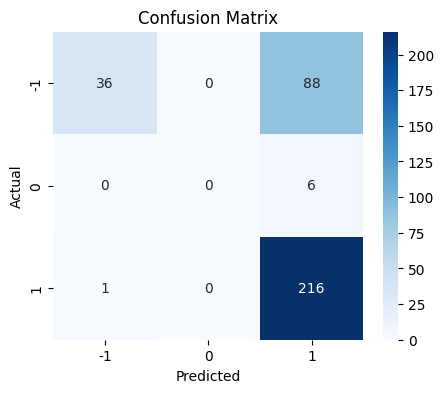

In [66]:
#plotting confusion matrix for training data
plot_confusion_matrix(y_train,y_pred_train)

* Confusion matrix for training data shows 94 False Positives

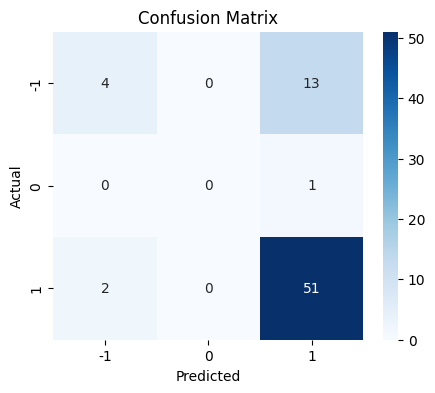

In [67]:
#plotting confusion matrix for testing data
plot_confusion_matrix(y_test,y_pred_test)

* The confusion matrix shows 14 FPs and 2 FNs

#### **Model's Classification Report**

In [68]:
#Calculating different metrics on training data
rf_train_wv1 = model_performance_classification_sklearn(y_train,y_pred_train)
print("Training performance:\n", rf_train_wv1)

Training performance:
    Accuracy    Recall  Precision        F1
0  0.726225  0.726225   0.783426  0.672437


* The accuracy and recall is about 72.6%, precision is about 78% and F1-score is 67.2% on training data.

In [69]:
#Calculating different metrics on testing data
rf_test_wv1 = model_performance_classification_sklearn(y_test,y_pred_test)
print("Testing performance:\n", rf_test_wv1)

Testing performance:
    Accuracy    Recall  Precision        F1
0  0.774648  0.774648   0.745323  0.728544


* The results on testing set are better with 77% accuracy and recall, 74.5% precision and around 72.8% F1-score

##### **Creating a Dataframe to Store Models Summary**

In [70]:
#Creating a blank DataFrame to store the training and testing evaluation results of different models.

evaluation_results = pd.DataFrame(columns=['Model', 'Text Embedding','Hyperparameters', 'Train_Accuracy', 'Train_Precision', 'Train_Recall', 'Train_F1',
                                           'Test_Accuracy', 'Test_Precision', 'Test_Recall', 'Test_F1'])

In [71]:
model_eval = {}
#adding model details
model_eval['Model'] = 'RF Model 1'
model_eval['Text Embedding'] = 'Word2Vec'
model_eval['Hyperparameters'] = 'n_est:100, max_dpth:3'
#adding training results
model_eval['Train_Accuracy'] = rf_train_wv1.iloc[0]['Accuracy']
model_eval['Train_Precision'] = rf_train_wv1.iloc[0]['Precision']
model_eval['Train_Recall'] = rf_train_wv1.iloc[0]['Recall']
model_eval['Train_F1'] = rf_train_wv1.iloc[0]['F1']
# adding testing results
model_eval['Test_Accuracy'] = rf_test_wv1.iloc[0]['Accuracy']
model_eval['Test_Precision'] = rf_test_wv1.iloc[0]['Precision']
model_eval['Test_Recall'] = rf_test_wv1.iloc[0]['Recall']
model_eval['Test_F1'] = rf_test_wv1.iloc[0]['F1']

# Append results to the evaluation_results DataFrame
evaluation_results = pd.concat([evaluation_results, pd.DataFrame([model_eval])], ignore_index=True)

# Display the evaluation_results DataFrame
print("Cumulative Evaluation Results:")
evaluation_results



Cumulative Evaluation Results:


,Model,Text Embedding,Hyperparameters,Train_Accuracy,Train_Precision,Train_Recall,Train_F1,Test_Accuracy,Test_Precision,Test_Recall,Test_F1
0,RF Model 1,Word2Vec,"n_est:100, max_dpth:3",0.726225,0.783426,0.726225,0.672437,0.774648,0.745323,0.774648,0.728544


#### **Creating Models by Varying Hyperparameters**
#### **Model2**
Increasing number of trees to 200 i.e., n_estimators=200

In [72]:
# Increasing n_estimators to 200
rf_wv2 = RandomForestClassifier(n_estimators=200, max_depth=3, random_state=42)

# Fitting on wv training data
rf_wv2.fit(X_train_wv, y_train)

RandomForestClassifier(max_depth=3, n_estimators=200, random_state=42)

Now we will assess the impact of increasing number of trees in the forest

In [73]:
# Predicting on train data
y_pred_train = rf_wv2.predict(X_train_wv)

# Predicting on test data
y_pred_test = rf_wv2.predict(X_test_wv)

#Calculating different metrics on training data
rf_train_wv2 = model_performance_classification_sklearn(y_train,y_pred_train)
print("Training performance:\n", rf_train_wv2)

#Calculating different metrics on training data
rf_test_wv2 = model_performance_classification_sklearn(y_test,y_pred_test)
print("Training performance:\n", rf_test_wv2)


model_eval = {}
#adding model details
model_eval['Model'] = 'RF Model 2'
model_eval['Text Embedding'] = 'Word2Vec'
model_eval['Hyperparameters'] = 'n_est:200, max_dpth:3'
#adding training results
model_eval['Train_Accuracy'] = rf_train_wv2.iloc[0]['Accuracy']
model_eval['Train_Precision'] = rf_train_wv2.iloc[0]['Precision']
model_eval['Train_Recall'] = rf_train_wv2.iloc[0]['Recall']
model_eval['Train_F1'] = rf_train_wv2.iloc[0]['F1']
# adding testing results
model_eval['Test_Accuracy'] = rf_test_wv2.iloc[0]['Accuracy']
model_eval['Test_Precision'] = rf_test_wv2.iloc[0]['Precision']
model_eval['Test_Recall'] = rf_test_wv2.iloc[0]['Recall']
model_eval['Test_F1'] = rf_test_wv2.iloc[0]['F1']

# Append results to the evaluation_results DataFrame
evaluation_results = pd.concat([evaluation_results, pd.DataFrame([model_eval])], ignore_index=True)

# Display the evaluation_results DataFrame
print("Cumulative Evaluation Results:")
evaluation_results



Training performance:
    Accuracy    Recall  Precision       F1
0  0.737752  0.737752   0.790064  0.68981
Training performance:
    Accuracy    Recall  Precision        F1
0  0.774648  0.774648   0.745323  0.728544
Cumulative Evaluation Results:


,Model,Text Embedding,Hyperparameters,Train_Accuracy,Train_Precision,Train_Recall,Train_F1,Test_Accuracy,Test_Precision,Test_Recall,Test_F1
0,RF Model 1,Word2Vec,"n_est:100, max_dpth:3",0.726225,0.783426,0.726225,0.672437,0.774648,0.745323,0.774648,0.728544
1,RF Model 2,Word2Vec,"n_est:200, max_dpth:3",0.737752,0.790064,0.737752,0.689810,0.774648,0.745323,0.774648,0.728544


* By increasing number of trees (n_estimators=200) there is slight improvement in training performance and no change in testing performance. Thus, it did not make much impact. So, keeping number of tress =100 for next model.
* Now assessing the impact of max_depth in model 3 below.

#### **Model3**
Increasing max depth of trees to 6

In [74]:
# Increasing max_depth to 6
rf_wv3 = RandomForestClassifier(n_estimators=100, max_depth=6, random_state=42)

# Fitting on wv training data
rf_wv3.fit(X_train_wv, y_train)

RandomForestClassifier(max_depth=6, random_state=42)

Now assessing the impact of increasing tree depth for the RF model.

In [75]:
# Predicting on train data
y_pred_train = rf_wv3.predict(X_train_wv)

# Predicting on test data
y_pred_test = rf_wv3.predict(X_test_wv)

#Calculating different metrics on training data
rf_train_wv3 = model_performance_classification_sklearn(y_train,y_pred_train)
print("Training performance:\n", rf_train_wv3)

#Calculating different metrics on training data
rf_test_wv3 = model_performance_classification_sklearn(y_test,y_pred_test)
print("Training performance:\n", rf_test_wv3)


model_eval = {}
#adding model details
model_eval['Model'] = 'RF Model 3'
model_eval['Text Embedding'] = 'Word2Vec'
model_eval['Hyperparameters'] = 'n_est:100, max_dpth:6'
#adding training results
model_eval['Train_Accuracy'] = rf_train_wv3.iloc[0]['Accuracy']
model_eval['Train_Precision'] = rf_train_wv3.iloc[0]['Precision']
model_eval['Train_Recall'] = rf_train_wv3.iloc[0]['Recall']
model_eval['Train_F1'] = rf_train_wv3.iloc[0]['F1']
# adding testing results
model_eval['Test_Accuracy'] = rf_test_wv3.iloc[0]['Accuracy']
model_eval['Test_Precision'] = rf_test_wv3.iloc[0]['Precision']
model_eval['Test_Recall'] = rf_test_wv3.iloc[0]['Recall']
model_eval['Test_F1'] = rf_test_wv3.iloc[0]['F1']

# Append results to the evaluation_results DataFrame
evaluation_results = pd.concat([evaluation_results, pd.DataFrame([model_eval])], ignore_index=True)

# Display the evaluation_results DataFrame
print("Cumulative Evaluation Results:")
evaluation_results


Training performance:
    Accuracy    Recall  Precision        F1
0  0.916427  0.916427   0.926279  0.912124
Training performance:
    Accuracy    Recall  Precision        F1
0  0.746479  0.746479   0.707112  0.717294
Cumulative Evaluation Results:


,Model,Text Embedding,Hyperparameters,Train_Accuracy,Train_Precision,Train_Recall,Train_F1,Test_Accuracy,Test_Precision,Test_Recall,Test_F1
0,RF Model 1,Word2Vec,"n_est:100, max_dpth:3",0.726225,0.783426,0.726225,0.672437,0.774648,0.745323,0.774648,0.728544
1,RF Model 2,Word2Vec,"n_est:200, max_dpth:3",0.737752,0.790064,0.737752,0.689810,0.774648,0.745323,0.774648,0.728544
2,RF Model 3,Word2Vec,"n_est:100, max_dpth:6",0.916427,0.926279,0.916427,0.912124,0.746479,0.707112,0.746479,0.717294


* Training performance sees a drastic improvement, but the testing performance drops. It means the model3 is overfitting the data. So, increasing max_depth=6 was not a good idea.

* Thus, we are now trying SentenceTransformer with max_depth=3, and n_est=100.

#### **Model 4**
Using SentenceTransformer Text Embeddings with RF model.

In [76]:
# Building RF model with sentencetransformer embeddings
rf_snt1 = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=42)

# Fitting on wv training data
rf_snt1.fit(X_train_snt, y_train)

RandomForestClassifier(max_depth=3, random_state=42)

Model is build, now getting the predictions and printing training and testing performance metrics.

Training performance:
    Accuracy    Recall  Precision       F1
0  0.795389  0.795389    0.82854  0.76786
Training performance:
    Accuracy    Recall  Precision        F1
0  0.732394  0.732394   0.554527  0.631169


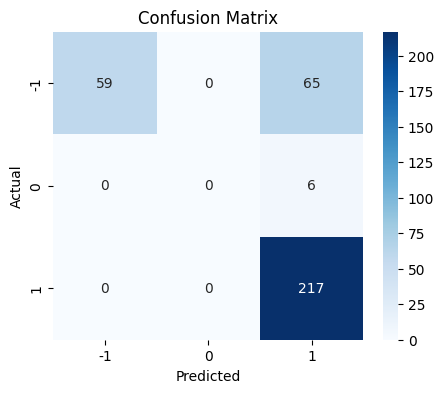

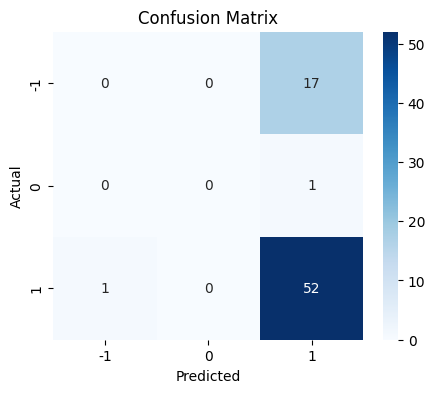

In [77]:
# Predicting on train data
y_pred_train = rf_snt1.predict(X_train_snt)

# Predicting on test data
y_pred_test = rf_snt1.predict(X_test_snt)

#Calculating different metrics on training data
rf_train_snt1 = model_performance_classification_sklearn(y_train,y_pred_train)
print("Training performance:\n", rf_train_snt1)

#Calculating different metrics on training data
rf_test_snt1 = model_performance_classification_sklearn(y_test,y_pred_test)
print("Training performance:\n", rf_test_snt1)

#plotting confusion matrix for training data
plot_confusion_matrix(y_train,y_pred_train)

#plotting confusion matrix for testing data
plot_confusion_matrix(y_test,y_pred_test)

* The training metrics have improved F1-score is 76.7%. However, the test accuracy has dropped to F1-score 63.1%

In [78]:
model_eval = {}
#adding model details
model_eval['Model'] = 'RF Model 4'
model_eval['Text Embedding'] = 'Sentence Transformer'
model_eval['Hyperparameters'] = 'n_est:100, max_dpth:3'
#adding training results
model_eval['Train_Accuracy'] = rf_train_snt1.iloc[0]['Accuracy']
model_eval['Train_Precision'] = rf_train_snt1.iloc[0]['Precision']
model_eval['Train_Recall'] = rf_train_snt1.iloc[0]['Recall']
model_eval['Train_F1'] = rf_train_snt1.iloc[0]['F1']
# adding testing results
model_eval['Test_Accuracy'] = rf_test_snt1.iloc[0]['Accuracy']
model_eval['Test_Precision'] = rf_test_snt1.iloc[0]['Precision']
model_eval['Test_Recall'] = rf_test_snt1.iloc[0]['Recall']
model_eval['Test_F1'] = rf_test_snt1.iloc[0]['F1']

# Append results to the evaluation_results DataFrame
evaluation_results = pd.concat([evaluation_results, pd.DataFrame([model_eval])], ignore_index=True)

# Display the evaluation_results DataFrame
print("Cumulative Evaluation Results:")
evaluation_results


Cumulative Evaluation Results:


,Model,Text Embedding,Hyperparameters,Train_Accuracy,Train_Precision,Train_Recall,Train_F1,Test_Accuracy,Test_Precision,Test_Recall,Test_F1
0,RF Model 1,Word2Vec,"n_est:100, max_dpth:3",0.726225,0.783426,0.726225,0.672437,0.774648,0.745323,0.774648,0.728544
1,RF Model 2,Word2Vec,"n_est:200, max_dpth:3",0.737752,0.790064,0.737752,0.689810,0.774648,0.745323,0.774648,0.728544
2,RF Model 3,Word2Vec,"n_est:100, max_dpth:6",0.916427,0.926279,0.916427,0.912124,0.746479,0.707112,0.746479,0.717294
3,RF Model 4,Sentence Transformer,"n_est:100, max_dpth:3",0.795389,0.828540,0.795389,0.767860,0.732394,0.554527,0.732394,0.631169


The training performance has improved, but testing performance drops with precision 55% and F1-score 63.1%
Perhaps, the model is overfitting. Lets try by reducing number of trees to 50 in next model.

#### **Model5**
Lets reduce number of trees to 50

In [79]:
# Building RF model with sentencetransformer embeddings and n_estimators=50
rf_snt2 = RandomForestClassifier(n_estimators=50, max_depth=3, random_state=42)

# Fitting on wv training data
rf_snt2.fit(X_train_snt, y_train)

RandomForestClassifier(max_depth=3, n_estimators=50, random_state=42)

Training performance:
    Accuracy    Recall  Precision        F1
0  0.792507  0.792507    0.82691  0.764137
Training performance:
    Accuracy    Recall  Precision        F1
0  0.760563  0.760563   0.730461  0.689489


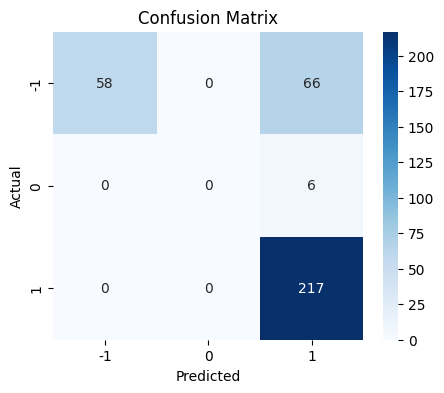

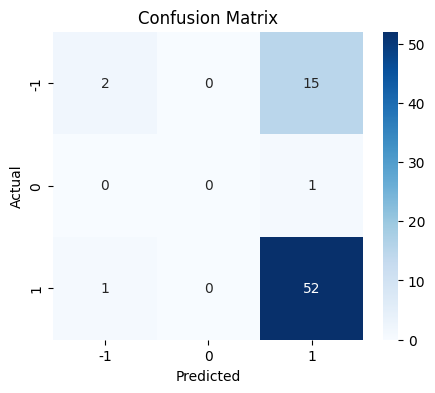

Cumulative Evaluation Results:


,Model,Text Embedding,Hyperparameters,Train_Accuracy,Train_Precision,Train_Recall,Train_F1,Test_Accuracy,Test_Precision,Test_Recall,Test_F1
0,RF Model 1,Word2Vec,"n_est:100, max_dpth:3",0.726225,0.783426,0.726225,0.672437,0.774648,0.745323,0.774648,0.728544
1,RF Model 2,Word2Vec,"n_est:200, max_dpth:3",0.737752,0.790064,0.737752,0.689810,0.774648,0.745323,0.774648,0.728544
2,RF Model 3,Word2Vec,"n_est:100, max_dpth:6",0.916427,0.926279,0.916427,0.912124,0.746479,0.707112,0.746479,0.717294
3,RF Model 4,Sentence Transformer,"n_est:100, max_dpth:3",0.795389,0.828540,0.795389,0.767860,0.732394,0.554527,0.732394,0.631169
4,RF Model 5,Sentence Transformer,"n_est:50, max_dpth:3",0.792507,0.826910,0.792507,0.764137,0.760563,0.730461,0.760563,0.689489


In [80]:
# Predicting on train data
y_pred_train = rf_snt2.predict(X_train_snt)

# Predicting on test data
y_pred_test = rf_snt2.predict(X_test_snt)

#Calculating different metrics on training data
rf_train_snt2 = model_performance_classification_sklearn(y_train,y_pred_train)
print("Training performance:\n", rf_train_snt2)

#Calculating different metrics on training data
rf_test_snt2 = model_performance_classification_sklearn(y_test,y_pred_test)
print("Training performance:\n", rf_test_snt2)

#plotting confusion matrix for training data
plot_confusion_matrix(y_train,y_pred_train)

#plotting confusion matrix for testing data
plot_confusion_matrix(y_test,y_pred_test)

model_eval = {}
#adding model details
model_eval['Model'] = 'RF Model 5'
model_eval['Text Embedding'] = 'Sentence Transformer'
model_eval['Hyperparameters'] = 'n_est:50, max_dpth:3'
#adding training results
model_eval['Train_Accuracy'] = rf_train_snt2.iloc[0]['Accuracy']
model_eval['Train_Precision'] = rf_train_snt2.iloc[0]['Precision']
model_eval['Train_Recall'] = rf_train_snt2.iloc[0]['Recall']
model_eval['Train_F1'] = rf_train_snt2.iloc[0]['F1']
# adding testing results
model_eval['Test_Accuracy'] = rf_test_snt2.iloc[0]['Accuracy']
model_eval['Test_Precision'] = rf_test_snt2.iloc[0]['Precision']
model_eval['Test_Recall'] = rf_test_snt2.iloc[0]['Recall']
model_eval['Test_F1'] = rf_test_snt2.iloc[0]['F1']

# Append results to the evaluation_results DataFrame
evaluation_results = pd.concat([evaluation_results, pd.DataFrame([model_eval])], ignore_index=True)

# Display the evaluation_results DataFrame
print("Cumulative Evaluation Results:")
evaluation_results


* Both training and testing performance has improved. Thus, having lesser number of trees proves to be better for sentence transformer embeddings.
* The confusion plots show 1 FN error and few FP errors.
* Lets further reduce number of trees to 30 in the next model.

#### **Model 6**
Lets reduce number of trees to 30

In [81]:
# Building RF model with sentencetransformer embeddings and n_estimators=30
rf_snt3 = RandomForestClassifier(n_estimators=30, max_depth=3, random_state=42)

# Fitting on wv training data
rf_snt3.fit(X_train_snt, y_train)

RandomForestClassifier(max_depth=3, n_estimators=30, random_state=42)

Training performance:
    Accuracy    Recall  Precision        F1
0  0.815562  0.815562   0.836669  0.793053
Training performance:
    Accuracy    Recall  Precision        F1
0  0.746479  0.746479   0.682282  0.661547


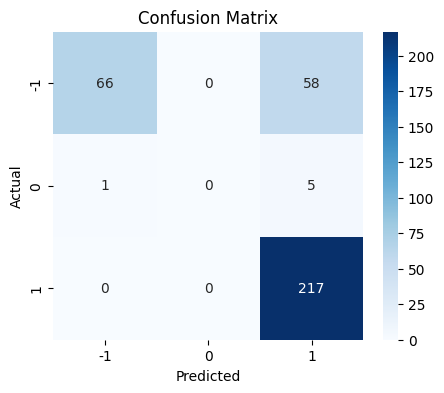

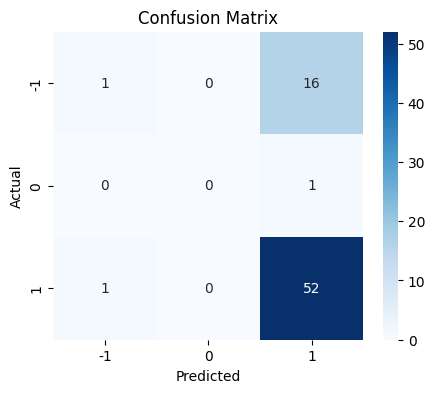

Cumulative Evaluation Results:


,Model,Text Embedding,Hyperparameters,Train_Accuracy,Train_Precision,Train_Recall,Train_F1,Test_Accuracy,Test_Precision,Test_Recall,Test_F1
0,RF Model 1,Word2Vec,"n_est:100, max_dpth:3",0.726225,0.783426,0.726225,0.672437,0.774648,0.745323,0.774648,0.728544
1,RF Model 2,Word2Vec,"n_est:200, max_dpth:3",0.737752,0.790064,0.737752,0.689810,0.774648,0.745323,0.774648,0.728544
2,RF Model 3,Word2Vec,"n_est:100, max_dpth:6",0.916427,0.926279,0.916427,0.912124,0.746479,0.707112,0.746479,0.717294
3,RF Model 4,Sentence Transformer,"n_est:100, max_dpth:3",0.795389,0.828540,0.795389,0.767860,0.732394,0.554527,0.732394,0.631169
4,RF Model 5,Sentence Transformer,"n_est:50, max_dpth:3",0.792507,0.826910,0.792507,0.764137,0.760563,0.730461,0.760563,0.689489
5,RF Model 6,Sentence Transformer,"n_est:30, max_dpth:3",0.815562,0.836669,0.815562,0.793053,0.746479,0.682282,0.746479,0.661547


In [82]:
# Predicting on train data
y_pred_train = rf_snt3.predict(X_train_snt)

# Predicting on test data
y_pred_test = rf_snt3.predict(X_test_snt)

#Calculating different metrics on training data
rf_train_snt3 = model_performance_classification_sklearn(y_train,y_pred_train)
print("Training performance:\n", rf_train_snt3)

#Calculating different metrics on training data
rf_test_snt3 = model_performance_classification_sklearn(y_test,y_pred_test)
print("Training performance:\n", rf_test_snt3)

#plotting confusion matrix for training data
plot_confusion_matrix(y_train,y_pred_train)

#plotting confusion matrix for testing data
plot_confusion_matrix(y_test,y_pred_test)

model_eval = {}
#adding model details
model_eval['Model'] = 'RF Model 6'
model_eval['Text Embedding'] = 'Sentence Transformer'
model_eval['Hyperparameters'] = 'n_est:30, max_dpth:3'
#adding training results
model_eval['Train_Accuracy'] = rf_train_snt3.iloc[0]['Accuracy']
model_eval['Train_Precision'] = rf_train_snt3.iloc[0]['Precision']
model_eval['Train_Recall'] = rf_train_snt3.iloc[0]['Recall']
model_eval['Train_F1'] = rf_train_snt3.iloc[0]['F1']
# adding testing results
model_eval['Test_Accuracy'] = rf_test_snt3.iloc[0]['Accuracy']
model_eval['Test_Precision'] = rf_test_snt3.iloc[0]['Precision']
model_eval['Test_Recall'] = rf_test_snt3.iloc[0]['Recall']
model_eval['Test_F1'] = rf_test_snt3.iloc[0]['F1']

# Append results to the evaluation_results DataFrame
evaluation_results = pd.concat([evaluation_results, pd.DataFrame([model_eval])], ignore_index=True)

# Display the evaluation_results DataFrame
print("Cumulative Evaluation Results:")
evaluation_results


* Both, the training and testing performance has improved. It is best model among Sentence Transformer embeddings, so far.
* The choice of number of trees=30 proves to be a better choice.
* Lets try to increase max depth to 6

#### **Model 7**
Lets increase max depth of trees to 6

In [83]:
# Building RF model with sentencetransformer embeddings and n_estimators=50 and max_depth=6
rf_snt4 = RandomForestClassifier(n_estimators=30, max_depth=6, random_state=42)

# Fitting on wv training data
rf_snt4.fit(X_train_snt, y_train)

RandomForestClassifier(max_depth=6, n_estimators=30, random_state=42)

Training performance:
    Accuracy    Recall  Precision        F1
0  0.985591  0.985591   0.985915  0.982785
Training performance:
    Accuracy    Recall  Precision        F1
0  0.732394  0.732394   0.674139  0.685115


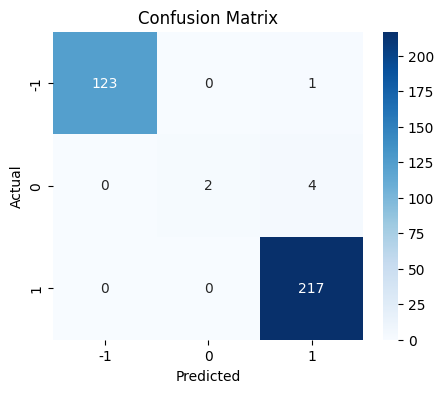

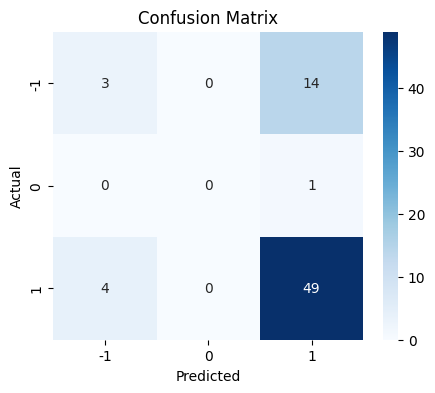

Cumulative Evaluation Results:


,Model,Text Embedding,Hyperparameters,Train_Accuracy,Train_Precision,Train_Recall,Train_F1,Test_Accuracy,Test_Precision,Test_Recall,Test_F1
0,RF Model 1,Word2Vec,"n_est:100, max_dpth:3",0.726225,0.783426,0.726225,0.672437,0.774648,0.745323,0.774648,0.728544
1,RF Model 2,Word2Vec,"n_est:200, max_dpth:3",0.737752,0.790064,0.737752,0.689810,0.774648,0.745323,0.774648,0.728544
2,RF Model 3,Word2Vec,"n_est:100, max_dpth:6",0.916427,0.926279,0.916427,0.912124,0.746479,0.707112,0.746479,0.717294
3,RF Model 4,Sentence Transformer,"n_est:100, max_dpth:3",0.795389,0.828540,0.795389,0.767860,0.732394,0.554527,0.732394,0.631169
4,RF Model 5,Sentence Transformer,"n_est:50, max_dpth:3",0.792507,0.826910,0.792507,0.764137,0.760563,0.730461,0.760563,0.689489
5,RF Model 6,Sentence Transformer,"n_est:30, max_dpth:3",0.815562,0.836669,0.815562,0.793053,0.746479,0.682282,0.746479,0.661547
6,RF Model 7,Sentence Transformer,"n_est:30, max_dpth:6",0.985591,0.985915,0.985591,0.982785,0.732394,0.674139,0.732394,0.685115


In [84]:
# Predicting on train data
y_pred_train = rf_snt4.predict(X_train_snt)

# Predicting on test data
y_pred_test = rf_snt4.predict(X_test_snt)

#Calculating different metrics on training data
rf_train_snt4 = model_performance_classification_sklearn(y_train,y_pred_train)
print("Training performance:\n", rf_train_snt4)

#Calculating different metrics on training data
rf_test_snt4 = model_performance_classification_sklearn(y_test,y_pred_test)
print("Training performance:\n", rf_test_snt4)

#plotting confusion matrix for training data
plot_confusion_matrix(y_train,y_pred_train)

#plotting confusion matrix for testing data
plot_confusion_matrix(y_test,y_pred_test)

model_eval = {}
#adding model details
model_eval['Model'] = 'RF Model 7'
model_eval['Text Embedding'] = 'Sentence Transformer'
model_eval['Hyperparameters'] = 'n_est:30, max_dpth:6'
#adding training results
model_eval['Train_Accuracy'] = rf_train_snt4.iloc[0]['Accuracy']
model_eval['Train_Precision'] = rf_train_snt4.iloc[0]['Precision']
model_eval['Train_Recall'] = rf_train_snt4.iloc[0]['Recall']
model_eval['Train_F1'] = rf_train_snt4.iloc[0]['F1']
# adding testing results
model_eval['Test_Accuracy'] = rf_test_snt4.iloc[0]['Accuracy']
model_eval['Test_Precision'] = rf_test_snt4.iloc[0]['Precision']
model_eval['Test_Recall'] = rf_test_snt4.iloc[0]['Recall']
model_eval['Test_F1'] = rf_test_snt4.iloc[0]['F1']

# Append results to the evaluation_results DataFrame
evaluation_results = pd.concat([evaluation_results, pd.DataFrame([model_eval])], ignore_index=True)

# Display the evaluation_results DataFrame
print("Cumulative Evaluation Results:")
evaluation_results


* The training performance has drastically improved close to 99%, but the testing performance sees no major improvement and is quite lower 68.5% than training performance.
* Clearly this model is overfitting and max depth should not be increased, the value of max_depth=3 was better value.

### **Summary of RF Models**
1.  With Word2Vec text encoding, the RF Model2 (n_estimators=200 and max_depth=3)is best with 68.9% training F1-score and 72.8% testing F1-score.
2. The RF model With Word2Vec embedding performs better with higher number of trees (n_estimators=200) and lesser max_depth(=3).
3. With Sentence Transformer embeddings, the RF Model6 (n_estimators=30 and max_depth=3) is best with 79.3% F1-score for training set and 66.1% F1-score for testing set.
4. The RF model with Sentence Transformer embedding performs better with lesser number of trees(30) and lesser max_depth(3).
5. Among the two types of embeddings, Word2Vec resulted in better test performance (model 1 and 2 with 72.8% F1-score), while Sentence Transformer embedding reulted better in training performance (79.3% F1 with model 6).

### **4. Sentiment Analysis using Neural Network Models using different text embeddings**
**One-hot Encoding training and testing Labels.**

In [85]:
#One-hot encoding Labels of training and testing set so as to apply NN Models.
y_train_encoded = pd.get_dummies(y_train, columns=['Label'], dtype=int)
y_test_encoded = pd.get_dummies(y_test, columns=['Label'], dtype=int)

print("shape of train encoded df",y_train_encoded.shape)
print("shape of test encoded df", y_test_encoded.shape)

shape of train encoded df (347, 3)
shape of test encoded df (71, 3)


#### **Model 1**

In [86]:
import gc

# Clear previous sessions
tf.keras.backend.clear_session()
gc.collect()

# Model definition
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(X_train_wv.shape[1],)))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(3, activation='softmax'))  # because we have 3 classes of sentiments

# Compiling the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │        38,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 63,491 (248.01 KB)

 Trainable params: 63,491 (248.01 KB)

 Non-trainable params: 0 (0.00 B)

Setting epochs=20 and batch_size=32

In [87]:
# Fitting the model
history = model.fit(X_train_wv, y_train_encoded,validation_data=(X_test_wv, y_test_encoded),epochs=20,batch_size=32)

Epoch 1/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.5780 - loss: 0.9149 - val_accuracy: 0.7465 - val_loss: 0.6197
Epoch 2/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6192 - loss: 0.7509 - val_accuracy: 0.7465 - val_loss: 0.7075
Epoch 3/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6223 - loss: 0.7282 - val_accuracy: 0.7465 - val_loss: 0.6357
Epoch 4/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6122 - loss: 0.7560 - val_accuracy: 0.7465 - val_loss: 0.6515
Epoch 5/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6181 - loss: 0.7240 - val_accuracy: 0.7465 - val_loss: 0.6323
Epoch 6/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6420 - loss: 0.7114 - val_accuracy: 0.7465 - val_loss: 0.6608
Epoch 7/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6364 - loss: 0.7158 - val_accuracy: 0.7606 - val_loss: 0.6406
Epoch 8/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6502 - loss: 0.7107 - val_accuracy: 0.7606 - v

##### **Checking Training and Testing performance**

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


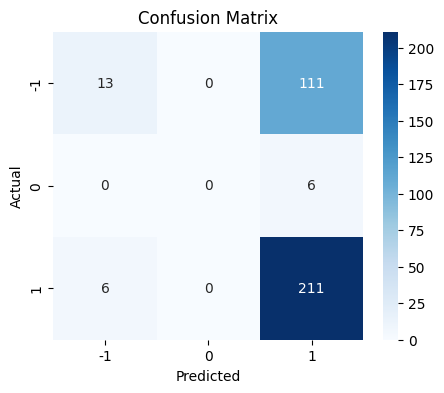

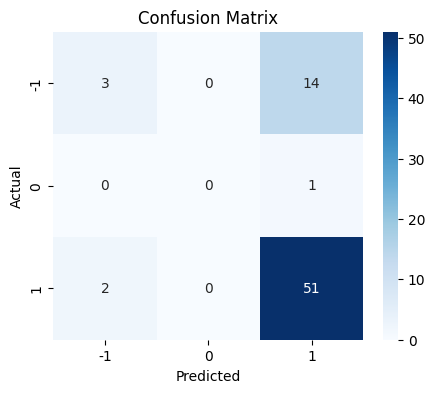

Training performance:
    Accuracy    Recall  Precision        F1
0  0.645533  0.645533   0.646791  0.549196
Testing performance:
    Accuracy    Recall  Precision       F1
0  0.760563  0.760563   0.720487  0.70514
Cumulative Evaluation Results:


,Model,Text Embedding,Hyperparameters,Train_Accuracy,Train_Precision,Train_Recall,Train_F1,Test_Accuracy,Test_Precision,Test_Recall,Test_F1
0,RF Model 1,Word2Vec,"n_est:100, max_dpth:3",0.726225,0.783426,0.726225,0.672437,0.774648,0.745323,0.774648,0.728544
1,RF Model 2,Word2Vec,"n_est:200, max_dpth:3",0.737752,0.790064,0.737752,0.689810,0.774648,0.745323,0.774648,0.728544
2,RF Model 3,Word2Vec,"n_est:100, max_dpth:6",0.916427,0.926279,0.916427,0.912124,0.746479,0.707112,0.746479,0.717294
3,RF Model 4,Sentence Transformer,"n_est:100, max_dpth:3",0.795389,0.828540,0.795389,0.767860,0.732394,0.554527,0.732394,0.631169
4,RF Model 5,Sentence Transformer,"n_est:50, max_dpth:3",0.792507,0.826910,0.792507,0.764137,0.760563,0.730461,0.760563,0.689489
5,RF Model 6,Sentence Transformer,"n_est:30, max_dpth:3",0.815562,0.836669,0.815562,0.793053,0.746479,0.682282,0.746479,0.661547
6,RF Model 7,Sentence Transformer,"n_est:30, max_dpth:6",0.985591,0.985915,0.985591,0.982785,0.732394,0.674139,0.732394,0.685115
7,NN Model 1,Word2Vec,"epochs:20, batch_size:32",0.645533,0.646791,0.645533,0.549196,0.760563,0.720487,0.760563,0.705140


In [88]:
# Predict class probabilities on training data
y_train_pred_probs = model.predict(X_train_wv)
# Convert probabilities to class labels
y_train_preds = tf.argmax(y_train_pred_probs, axis=1).numpy()

# Predict class probabilities on test data
y_test_pred_probs = model.predict(X_test_wv)
# Convert probabilities to class labels
y_test_preds = tf.argmax(y_test_pred_probs, axis=1).numpy()

# Converting back 0, 1, 2 class labels given by argmax to [-1, 0, 1] to match utility function expectations
label_mapping = {2: 1, 0: -1, 1: 0}
y_train_preds = np.array([label_mapping[index] for index in y_train_preds])
y_test_preds = np.array([label_mapping[index] for index in y_test_preds])

#plotting confusion matrices
plot_confusion_matrix(y_train,y_train_preds)
plot_confusion_matrix(y_test,y_test_preds)

#Calculating performance metrics on training data
nn_train_wv = model_performance_classification_sklearn(y_train,y_train_preds)
print("Training performance:\n", nn_train_wv)

#Calculating performance metrics on testing data
nn_test_wv = model_performance_classification_sklearn(y_test,y_test_preds)
print("Testing performance:\n", nn_test_wv)

model_eval = {}
#adding model details
model_eval['Model'] = 'NN Model 1'
model_eval['Text Embedding'] = 'Word2Vec'
model_eval['Hyperparameters'] = 'epochs:20, batch_size:32'
#adding training results
model_eval['Train_Accuracy'] = nn_train_wv.iloc[0]['Accuracy']
model_eval['Train_Precision'] = nn_train_wv.iloc[0]['Precision']
model_eval['Train_Recall'] = nn_train_wv.iloc[0]['Recall']
model_eval['Train_F1'] = nn_train_wv.iloc[0]['F1']
# adding testing results
model_eval['Test_Accuracy'] = nn_test_wv.iloc[0]['Accuracy']
model_eval['Test_Precision'] = nn_test_wv.iloc[0]['Precision']
model_eval['Test_Recall'] = nn_test_wv.iloc[0]['Recall']
model_eval['Test_F1'] = nn_test_wv.iloc[0]['F1']

# Append results to the evaluation_results DataFrame
evaluation_results = pd.concat([evaluation_results, pd.DataFrame([model_eval])], ignore_index=True)

# Display the evaluation_results DataFrame
print("Cumulative Evaluation Results:")
evaluation_results

* The performance on training set is 54.9% F1-score and for testing set is 70.5% F1-score
* The confusion matrices show that FP error is higher
* The model has learned less in 20 epochs. So let's increase epochs to let the model learn for more iterations.

#### **Model2**
Lets see impact of number of epochs.

In [89]:
import gc

# Clear previous sessions
tf.keras.backend.clear_session()
gc.collect()

# Model definition
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(X_train_wv.shape[1],)))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(3, activation='softmax'))  # because we have 3 classes of sentiments

# Compiling the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │        38,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 63,491 (248.01 KB)

 Trainable params: 63,491 (248.01 KB)

 Non-trainable params: 0 (0.00 B)

Setting number of epochs=50

In [90]:
# Fitting the model
history = model.fit(X_train_wv, y_train_encoded,validation_data=(X_test_wv, y_test_encoded),epochs=50,batch_size=32)

Epoch 1/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.4785 - loss: 0.9986 - val_accuracy: 0.7465 - val_loss: 0.6661
Epoch 2/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5968 - loss: 0.7547 - val_accuracy: 0.7465 - val_loss: 0.6388
Epoch 3/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6339 - loss: 0.7316 - val_accuracy: 0.7465 - val_loss: 0.6670
Epoch 4/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6386 - loss: 0.6985 - val_accuracy: 0.7465 - val_loss: 0.6524
Epoch 5/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6287 - loss: 0.7061 - val_accuracy: 0.7465 - val_loss: 0.6466
Epoch 6/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6069 - loss: 0.7544 - val_accuracy: 0.7465 - val_loss: 0.6366
Epoch 7/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6501 - loss: 0.7205 - val_accuracy: 0.7465 - val_loss: 0.6652
Epoch 8/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6364 - loss: 0.7279 - val_accuracy: 0.7465 - v

##### **Checking Training and Testing Performance**

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


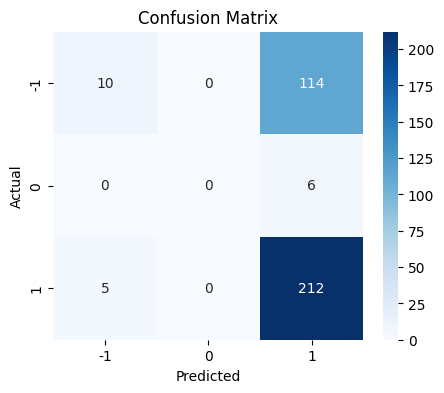

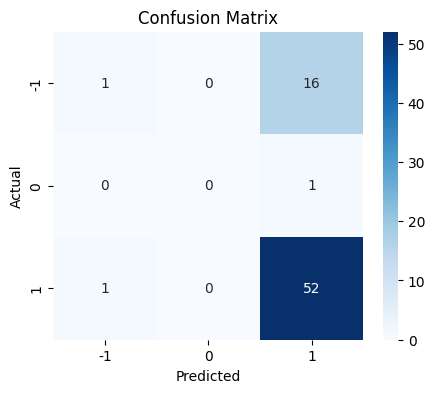

Training performance:
    Accuracy    Recall  Precision        F1
0  0.639769  0.639769   0.637559  0.534391
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.746479  0.746479   0.682282  0.661547
Cumulative Evaluation Results:


,Model,Text Embedding,Hyperparameters,Train_Accuracy,Train_Precision,Train_Recall,Train_F1,Test_Accuracy,Test_Precision,Test_Recall,Test_F1
0,RF Model 1,Word2Vec,"n_est:100, max_dpth:3",0.726225,0.783426,0.726225,0.672437,0.774648,0.745323,0.774648,0.728544
1,RF Model 2,Word2Vec,"n_est:200, max_dpth:3",0.737752,0.790064,0.737752,0.689810,0.774648,0.745323,0.774648,0.728544
2,RF Model 3,Word2Vec,"n_est:100, max_dpth:6",0.916427,0.926279,0.916427,0.912124,0.746479,0.707112,0.746479,0.717294
3,RF Model 4,Sentence Transformer,"n_est:100, max_dpth:3",0.795389,0.828540,0.795389,0.767860,0.732394,0.554527,0.732394,0.631169
4,RF Model 5,Sentence Transformer,"n_est:50, max_dpth:3",0.792507,0.826910,0.792507,0.764137,0.760563,0.730461,0.760563,0.689489
5,RF Model 6,Sentence Transformer,"n_est:30, max_dpth:3",0.815562,0.836669,0.815562,0.793053,0.746479,0.682282,0.746479,0.661547
6,RF Model 7,Sentence Transformer,"n_est:30, max_dpth:6",0.985591,0.985915,0.985591,0.982785,0.732394,0.674139,0.732394,0.685115
7,NN Model 1,Word2Vec,"epochs:20, batch_size:32",0.645533,0.646791,0.645533,0.549196,0.760563,0.720487,0.760563,0.705140
8,NN Model 2,Word2Vec,"epochs:50, batch_size:32",0.639769,0.637559,0.639769,0.534391,0.746479,0.682282,0.746479,0.661547


In [91]:
# Predict class probabilities on training data
y_train_pred_probs = model.predict(X_train_wv)
# Convert probabilities to class labels
y_train_preds = tf.argmax(y_train_pred_probs, axis=1).numpy()

# Predict class probabilities on test data
y_test_pred_probs = model.predict(X_test_wv)
# Convert probabilities to class labels
y_test_preds = tf.argmax(y_test_pred_probs, axis=1).numpy()

# Converting back 0, 1, 2 class labels given by argmax to [-1, 0, 1] to match utility function expectations
label_mapping = {2: 1, 0: -1, 1: 0}
y_train_preds = np.array([label_mapping[index] for index in y_train_preds])
y_test_preds = np.array([label_mapping[index] for index in y_test_preds])

#plotting confusion matrices
plot_confusion_matrix(y_train,y_train_preds)
plot_confusion_matrix(y_test,y_test_preds)

#Calculating performance metrics on training data
nn_train_wv = model_performance_classification_sklearn(y_train,y_train_preds)
print("Training performance:\n", nn_train_wv)

#Calculating performance metrics on testing data
nn_test_wv = model_performance_classification_sklearn(y_test,y_test_preds)
print("Testing performance:\n", nn_test_wv)

model_eval = {}
#adding model details
model_eval['Model'] = 'NN Model 2'
model_eval['Text Embedding'] = 'Word2Vec'
model_eval['Hyperparameters'] = 'epochs:50, batch_size:32'
#adding training results
model_eval['Train_Accuracy'] = nn_train_wv.iloc[0]['Accuracy']
model_eval['Train_Precision'] = nn_train_wv.iloc[0]['Precision']
model_eval['Train_Recall'] = nn_train_wv.iloc[0]['Recall']
model_eval['Train_F1'] = nn_train_wv.iloc[0]['F1']
# adding testing results
model_eval['Test_Accuracy'] = nn_test_wv.iloc[0]['Accuracy']
model_eval['Test_Precision'] = nn_test_wv.iloc[0]['Precision']
model_eval['Test_Recall'] = nn_test_wv.iloc[0]['Recall']
model_eval['Test_F1'] = nn_test_wv.iloc[0]['F1']

# Append results to the evaluation_results DataFrame
evaluation_results = pd.concat([evaluation_results, pd.DataFrame([model_eval])], ignore_index=True)

# Display the evaluation_results DataFrame
print("Cumulative Evaluation Results:")
evaluation_results

* Both training and testing performance has dropped by increasing epochs to 50.
* So, keeping epochs to 20 for next model.
* Let's try to increase batch size.

#### **Model 3**
Let's see the impact of increasing batch size to 64.

In [92]:
import gc

# Clear previous sessions
tf.keras.backend.clear_session()
gc.collect()

# Model definition
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(X_train_wv.shape[1],)))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(3, activation='softmax'))  # because we have 3 classes of sentiments

# Compiling the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │        38,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 63,491 (248.01 KB)

 Trainable params: 63,491 (248.01 KB)

 Non-trainable params: 0 (0.00 B)

Setting batch size to 64

In [93]:
# Fitting the model
history = model.fit(X_train_wv, y_train_encoded,validation_data=(X_test_wv, y_test_encoded),epochs=20,batch_size=64)

Epoch 1/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 99ms/step - accuracy: 0.4049 - loss: 1.0057 - val_accuracy: 0.7465 - val_loss: 0.6949
Epoch 2/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.6221 - loss: 0.7843 - val_accuracy: 0.7465 - val_loss: 0.6650
Epoch 3/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.6303 - loss: 0.7406 - val_accuracy: 0.7465 - val_loss: 0.6478
Epoch 4/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.6382 - loss: 0.7012 - val_accuracy: 0.7465 - val_loss: 0.6715
Epoch 5/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 92ms/step - accuracy: 0.6394 - loss: 0.7224 - val_accuracy: 0.7465 - val_loss: 0.6495
Epoch 6/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.6035 - loss: 0.7782 - val_accuracy: 0.7465 - val_loss: 0.6371
Epoch 7/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6177 - loss: 0.7126 - val_accuracy: 0.7465 - val_loss: 0.6414
Epoch 8/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6063 - loss: 0.7381 - val_accuracy: 0.7465 - val_loss: 0.6425


##### **Checking Training and Testing Performance**

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


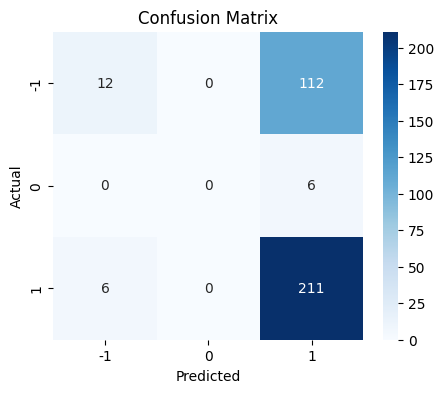

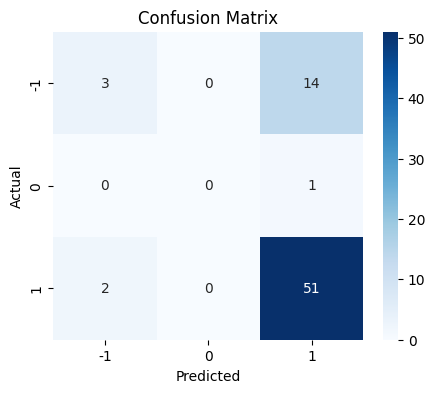

Training performance:
    Accuracy    Recall  Precision        F1
0  0.642651  0.642651   0.639299  0.543734
Testing performance:
    Accuracy    Recall  Precision       F1
0  0.760563  0.760563   0.720487  0.70514
Cumulative Evaluation Results:


,Model,Text Embedding,Hyperparameters,Train_Accuracy,Train_Precision,Train_Recall,Train_F1,Test_Accuracy,Test_Precision,Test_Recall,Test_F1
0,RF Model 1,Word2Vec,"n_est:100, max_dpth:3",0.726225,0.783426,0.726225,0.672437,0.774648,0.745323,0.774648,0.728544
1,RF Model 2,Word2Vec,"n_est:200, max_dpth:3",0.737752,0.790064,0.737752,0.689810,0.774648,0.745323,0.774648,0.728544
2,RF Model 3,Word2Vec,"n_est:100, max_dpth:6",0.916427,0.926279,0.916427,0.912124,0.746479,0.707112,0.746479,0.717294
3,RF Model 4,Sentence Transformer,"n_est:100, max_dpth:3",0.795389,0.828540,0.795389,0.767860,0.732394,0.554527,0.732394,0.631169
4,RF Model 5,Sentence Transformer,"n_est:50, max_dpth:3",0.792507,0.826910,0.792507,0.764137,0.760563,0.730461,0.760563,0.689489
5,RF Model 6,Sentence Transformer,"n_est:30, max_dpth:3",0.815562,0.836669,0.815562,0.793053,0.746479,0.682282,0.746479,0.661547
6,RF Model 7,Sentence Transformer,"n_est:30, max_dpth:6",0.985591,0.985915,0.985591,0.982785,0.732394,0.674139,0.732394,0.685115
7,NN Model 1,Word2Vec,"epochs:20, batch_size:32",0.645533,0.646791,0.645533,0.549196,0.760563,0.720487,0.760563,0.705140
8,NN Model 2,Word2Vec,"epochs:50, batch_size:32",0.639769,0.637559,0.639769,0.534391,0.746479,0.682282,0.746479,0.661547
9,NN Model 3,Word2Vec,"epochs:20, batch_size:64",0.642651,0.639299,0.642651,0.543734,0.760563,0.720487,0.760563,0.705140


In [94]:
# Predict class probabilities on training data
y_train_pred_probs = model.predict(X_train_wv)
# Convert probabilities to class labels
y_train_preds = tf.argmax(y_train_pred_probs, axis=1).numpy()

# Predict class probabilities on test data
y_test_pred_probs = model.predict(X_test_wv)
# Convert probabilities to class labels
y_test_preds = tf.argmax(y_test_pred_probs, axis=1).numpy()

# Converting back 0, 1, 2 class labels given by argmax to [-1, 0, 1] to match utility function expectations
label_mapping = {2: 1, 0: -1, 1: 0}
y_train_preds = np.array([label_mapping[index] for index in y_train_preds])
y_test_preds = np.array([label_mapping[index] for index in y_test_preds])

#plotting confusion matrices
plot_confusion_matrix(y_train,y_train_preds)
plot_confusion_matrix(y_test,y_test_preds)

#Calculating performance metrics on training data
nn_train_wv = model_performance_classification_sklearn(y_train,y_train_preds)
print("Training performance:\n", nn_train_wv)

#Calculating performance metrics on testing data
nn_test_wv = model_performance_classification_sklearn(y_test,y_test_preds)
print("Testing performance:\n", nn_test_wv)

model_eval = {}
#adding model details
model_eval['Model'] = 'NN Model 3'
model_eval['Text Embedding'] = 'Word2Vec'
model_eval['Hyperparameters'] = 'epochs:20, batch_size:64'
#adding training results
model_eval['Train_Accuracy'] = nn_train_wv.iloc[0]['Accuracy']
model_eval['Train_Precision'] = nn_train_wv.iloc[0]['Precision']
model_eval['Train_Recall'] = nn_train_wv.iloc[0]['Recall']
model_eval['Train_F1'] = nn_train_wv.iloc[0]['F1']
# adding testing results
model_eval['Test_Accuracy'] = nn_test_wv.iloc[0]['Accuracy']
model_eval['Test_Precision'] = nn_test_wv.iloc[0]['Precision']
model_eval['Test_Recall'] = nn_test_wv.iloc[0]['Recall']
model_eval['Test_F1'] = nn_test_wv.iloc[0]['F1']

# Append results to the evaluation_results DataFrame
evaluation_results = pd.concat([evaluation_results, pd.DataFrame([model_eval])], ignore_index=True)

# Display the evaluation_results DataFrame
print("Cumulative Evaluation Results:")
evaluation_results

* Comparing with Model 1, there is slight drop in training perforamnce, however the testing performance is same.
* So far, the Model 1 with less epochs (20) and smaller batch size (32) gave the best performance for NN models.
* Let's try NN model with Sentence Embeddings.


#### **Model 4**
NN Models with Sentence Transformer Embeddings

In [95]:
import gc

# Clear previous sessions
tf.keras.backend.clear_session()
gc.collect()

# Model definition
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(X_train_snt_pd.shape[1],)))    #training set is from sentence transformer encoded train set
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(3, activation='softmax'))  # because we have 3 classes of sentiments

# Compiling the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │        49,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 74,243 (290.01 KB)

 Trainable params: 74,243 (290.01 KB)

 Non-trainable params: 0 (0.00 B)

Setting epochs=20 and batch size=32

In [96]:
# Fitting the model
history = model.fit(X_train_snt_pd, y_train_encoded,validation_data=(X_test_snt_pd, y_test_encoded),epochs=20,batch_size=32)

Epoch 1/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.4965 - loss: 1.0461 - val_accuracy: 0.7465 - val_loss: 0.8156
Epoch 2/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6284 - loss: 0.7847 - val_accuracy: 0.7465 - val_loss: 0.6286
Epoch 3/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6368 - loss: 0.7280 - val_accuracy: 0.7042 - val_loss: 0.6230
Epoch 4/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6787 - loss: 0.6528 - val_accuracy: 0.7324 - val_loss: 0.5733
Epoch 5/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7152 - loss: 0.6230 - val_accuracy: 0.7606 - val_loss: 0.5509
Epoch 6/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7989 - loss: 0.5242 - val_accuracy: 0.7746 - val_loss: 0.5523
Epoch 7/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7950 - loss: 0.4952 - val_accuracy: 0.7324 - val_loss: 0.5382
Epoch 8/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8180 - loss: 0.4597 - val_accuracy: 0.7606 - v

##### **Checking Training and Testing Performance**

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


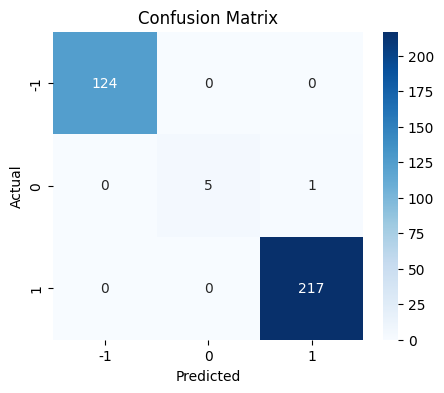

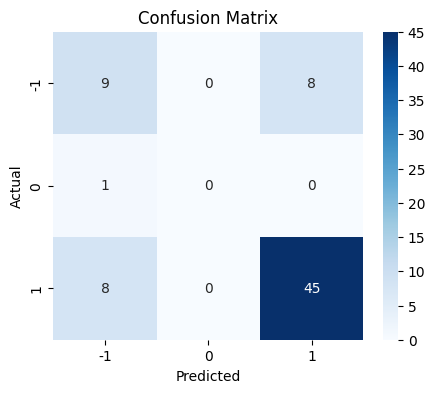

Training performance:
    Accuracy    Recall  Precision       F1
0  0.997118  0.997118   0.997131  0.99699
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.760563  0.760563   0.753521  0.756942
Cumulative Evaluation Results:


,Model,Text Embedding,Hyperparameters,Train_Accuracy,Train_Precision,Train_Recall,Train_F1,Test_Accuracy,Test_Precision,Test_Recall,Test_F1
0,RF Model 1,Word2Vec,"n_est:100, max_dpth:3",0.726225,0.783426,0.726225,0.672437,0.774648,0.745323,0.774648,0.728544
1,RF Model 2,Word2Vec,"n_est:200, max_dpth:3",0.737752,0.790064,0.737752,0.689810,0.774648,0.745323,0.774648,0.728544
2,RF Model 3,Word2Vec,"n_est:100, max_dpth:6",0.916427,0.926279,0.916427,0.912124,0.746479,0.707112,0.746479,0.717294
3,RF Model 4,Sentence Transformer,"n_est:100, max_dpth:3",0.795389,0.828540,0.795389,0.767860,0.732394,0.554527,0.732394,0.631169
4,RF Model 5,Sentence Transformer,"n_est:50, max_dpth:3",0.792507,0.826910,0.792507,0.764137,0.760563,0.730461,0.760563,0.689489
5,RF Model 6,Sentence Transformer,"n_est:30, max_dpth:3",0.815562,0.836669,0.815562,0.793053,0.746479,0.682282,0.746479,0.661547
6,RF Model 7,Sentence Transformer,"n_est:30, max_dpth:6",0.985591,0.985915,0.985591,0.982785,0.732394,0.674139,0.732394,0.685115
7,NN Model 1,Word2Vec,"epochs:20, batch_size:32",0.645533,0.646791,0.645533,0.549196,0.760563,0.720487,0.760563,0.705140
8,NN Model 2,Word2Vec,"epochs:50, batch_size:32",0.639769,0.637559,0.639769,0.534391,0.746479,0.682282,0.746479,0.661547
9,NN Model 3,Word2Vec,"epochs:20, batch_size:64",0.642651,0.639299,0.642651,0.543734,0.760563,0.720487,0.760563,0.705140


In [97]:
# Predict class probabilities on training data
y_train_pred_probs = model.predict(X_train_snt_pd)
# Convert probabilities to class labels
y_train_preds = tf.argmax(y_train_pred_probs, axis=1).numpy()

# Predict class probabilities on test data
y_test_pred_probs = model.predict(X_test_snt_pd)
# Convert probabilities to class labels
y_test_preds = tf.argmax(y_test_pred_probs, axis=1).numpy()

# Converting back 0, 1, 2 class labels given by argmax to [-1, 0, 1] to match utility function expectations
label_mapping = {2: 1, 0: -1, 1: 0}
y_train_preds = np.array([label_mapping[index] for index in y_train_preds])
y_test_preds = np.array([label_mapping[index] for index in y_test_preds])

#plotting confusion matrices
plot_confusion_matrix(y_train,y_train_preds)
plot_confusion_matrix(y_test,y_test_preds)

#Calculating performance metrics on training data
nn_train_wv = model_performance_classification_sklearn(y_train,y_train_preds)
print("Training performance:\n", nn_train_wv)

#Calculating performance metrics on testing data
nn_test_wv = model_performance_classification_sklearn(y_test,y_test_preds)
print("Testing performance:\n", nn_test_wv)

model_eval = {}
#adding model details
model_eval['Model'] = 'NN Model 4'
model_eval['Text Embedding'] = 'Sentence Transformer'
model_eval['Hyperparameters'] = 'epochs:20, batch_size:32'
#adding training results
model_eval['Train_Accuracy'] = nn_train_wv.iloc[0]['Accuracy']
model_eval['Train_Precision'] = nn_train_wv.iloc[0]['Precision']
model_eval['Train_Recall'] = nn_train_wv.iloc[0]['Recall']
model_eval['Train_F1'] = nn_train_wv.iloc[0]['F1']
# adding testing results
model_eval['Test_Accuracy'] = nn_test_wv.iloc[0]['Accuracy']
model_eval['Test_Precision'] = nn_test_wv.iloc[0]['Precision']
model_eval['Test_Recall'] = nn_test_wv.iloc[0]['Recall']
model_eval['Test_F1'] = nn_test_wv.iloc[0]['F1']

# Append results to the evaluation_results DataFrame
evaluation_results = pd.concat([evaluation_results, pd.DataFrame([model_eval])], ignore_index=True)

# Display the evaluation_results DataFrame
print("Cumulative Evaluation Results:")
evaluation_results

* The training F1-score is about 99.6% and testing F1-score is 75.6%, the best performance so far, attributed by the complex NN model and context-aware sentence embeddings.
* The model learned very well, so we are not increasing epochs to give the model a chance to learn more.
* Lets try by increasing batch size to 64

#### **Model 5**
Increasing batch size to 64.

In [98]:
import gc

# Clear previous sessions
tf.keras.backend.clear_session()
gc.collect()

# Model definition
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(X_train_snt_pd.shape[1],)))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(3, activation='softmax'))  # because we have 3 classes of sentiments

# Compiling the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │        49,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 74,243 (290.01 KB)

 Trainable params: 74,243 (290.01 KB)

 Non-trainable params: 0 (0.00 B)

Setting batch size to 64

In [99]:
# Fitting the model
history = model.fit(X_train_snt_pd, y_train_encoded,validation_data=(X_test_snt_pd, y_test_encoded),epochs=20,batch_size=64)

Epoch 1/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 116ms/step - accuracy: 0.4181 - loss: 1.0785 - val_accuracy: 0.7465 - val_loss: 0.9628
Epoch 2/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.6309 - loss: 0.9642 - val_accuracy: 0.7465 - val_loss: 0.8014
Epoch 3/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.6245 - loss: 0.8362 - val_accuracy: 0.7465 - val_loss: 0.6689
Epoch 4/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.6237 - loss: 0.7354 - val_accuracy: 0.7465 - val_loss: 0.6217
Epoch 5/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 0.6484 - loss: 0.6821 - val_accuracy: 0.7183 - val_loss: 0.5794
Epoch 6/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.6776 - loss: 0.6250 - val_accuracy: 0.7887 - val_loss: 0.5809
Epoch 7/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.7375 - loss: 0.5788 - val_accuracy: 0.7465 - val_loss: 0.5407
Epoch 8/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.7850 - loss: 0.5316 - val_accuracy: 0.7465 - val_loss: 0.5218

##### **Checking Training and Testing Performance**

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


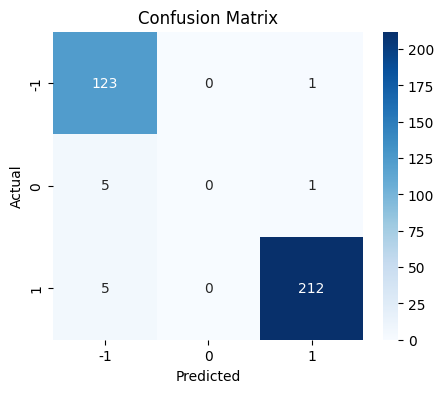

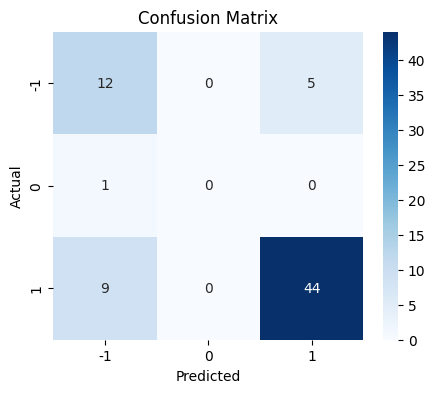

Training performance:
    Accuracy    Recall  Precision        F1
0  0.965418  0.965418   0.949996  0.957257
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.788732  0.788732   0.800909  0.791367
Cumulative Evaluation Results:


,Model,Text Embedding,Hyperparameters,Train_Accuracy,Train_Precision,Train_Recall,Train_F1,Test_Accuracy,Test_Precision,Test_Recall,Test_F1
0,RF Model 1,Word2Vec,"n_est:100, max_dpth:3",0.726225,0.783426,0.726225,0.672437,0.774648,0.745323,0.774648,0.728544
1,RF Model 2,Word2Vec,"n_est:200, max_dpth:3",0.737752,0.790064,0.737752,0.689810,0.774648,0.745323,0.774648,0.728544
2,RF Model 3,Word2Vec,"n_est:100, max_dpth:6",0.916427,0.926279,0.916427,0.912124,0.746479,0.707112,0.746479,0.717294
3,RF Model 4,Sentence Transformer,"n_est:100, max_dpth:3",0.795389,0.828540,0.795389,0.767860,0.732394,0.554527,0.732394,0.631169
4,RF Model 5,Sentence Transformer,"n_est:50, max_dpth:3",0.792507,0.826910,0.792507,0.764137,0.760563,0.730461,0.760563,0.689489
5,RF Model 6,Sentence Transformer,"n_est:30, max_dpth:3",0.815562,0.836669,0.815562,0.793053,0.746479,0.682282,0.746479,0.661547
6,RF Model 7,Sentence Transformer,"n_est:30, max_dpth:6",0.985591,0.985915,0.985591,0.982785,0.732394,0.674139,0.732394,0.685115
7,NN Model 1,Word2Vec,"epochs:20, batch_size:32",0.645533,0.646791,0.645533,0.549196,0.760563,0.720487,0.760563,0.705140
8,NN Model 2,Word2Vec,"epochs:50, batch_size:32",0.639769,0.637559,0.639769,0.534391,0.746479,0.682282,0.746479,0.661547
9,NN Model 3,Word2Vec,"epochs:20, batch_size:64",0.642651,0.639299,0.642651,0.543734,0.760563,0.720487,0.760563,0.705140


In [100]:
# Predict class probabilities on training data
y_train_pred_probs = model.predict(X_train_snt_pd)
# Convert probabilities to class labels
y_train_preds = tf.argmax(y_train_pred_probs, axis=1).numpy()

# Predict class probabilities on test data
y_test_pred_probs = model.predict(X_test_snt_pd)
# Convert probabilities to class labels
y_test_preds = tf.argmax(y_test_pred_probs, axis=1).numpy()

# Converting back 0, 1, 2 class labels given by argmax to [-1, 0, 1] to match utility function expectations
label_mapping = {2: 1, 0: -1, 1: 0}
y_train_preds = np.array([label_mapping[index] for index in y_train_preds])
y_test_preds = np.array([label_mapping[index] for index in y_test_preds])

#plotting confusion matrices
plot_confusion_matrix(y_train,y_train_preds)
plot_confusion_matrix(y_test,y_test_preds)

#Calculating performance metrics on training data
nn_train_wv = model_performance_classification_sklearn(y_train,y_train_preds)
print("Training performance:\n", nn_train_wv)

#Calculating performance metrics on testing data
nn_test_wv = model_performance_classification_sklearn(y_test,y_test_preds)
print("Testing performance:\n", nn_test_wv)

model_eval = {}
#adding model details
model_eval['Model'] = 'NN Model 5'
model_eval['Text Embedding'] = 'Sentence Transformer'
model_eval['Hyperparameters'] = 'epochs:20, batch_size:64'
#adding training results
model_eval['Train_Accuracy'] = nn_train_wv.iloc[0]['Accuracy']
model_eval['Train_Precision'] = nn_train_wv.iloc[0]['Precision']
model_eval['Train_Recall'] = nn_train_wv.iloc[0]['Recall']
model_eval['Train_F1'] = nn_train_wv.iloc[0]['F1']
# adding testing results
model_eval['Test_Accuracy'] = nn_test_wv.iloc[0]['Accuracy']
model_eval['Test_Precision'] = nn_test_wv.iloc[0]['Precision']
model_eval['Test_Recall'] = nn_test_wv.iloc[0]['Recall']
model_eval['Test_F1'] = nn_test_wv.iloc[0]['F1']

# Append results to the evaluation_results DataFrame
evaluation_results = pd.concat([evaluation_results, pd.DataFrame([model_eval])], ignore_index=True)

# Display the evaluation_results DataFrame
print("Cumulative Evaluation Results:")
evaluation_results

* The test performance has improved by setting batch size to 64.
* Now, lets try, sentence embeddings with dropout layers in the model (20 epochs, 32 batch size)

#### **Model 6**
Adding dropout layers in the model

In [109]:
import gc

# Clear previous sessions
tf.keras.backend.clear_session()
gc.collect()

# Model definition
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(X_train_snt_pd.shape[1],)))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dense(3, activation='softmax'))  # because we have 3 classes of sentiments

# Compiling the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │        49,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 74,243 (290.01 KB)

 Trainable params: 74,243 (290.01 KB)

 Non-trainable params: 0 (0.00 B)

Setting epochs=20 and batch_size=32

In [110]:
# Fitting the model
history = model.fit(X_train_snt_pd, y_train_encoded,validation_data=(X_test_snt_pd, y_test_encoded),epochs=20,batch_size=32)

Epoch 1/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 14s 136ms/step - accuracy: 0.4600 - loss: 1.0457 - val_accuracy: 0.7465 - val_loss: 0.8252
Epoch 2/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - accuracy: 0.6390 - loss: 0.8015 - val_accuracy: 0.7465 - val_loss: 0.6335
Epoch 3/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - accuracy: 0.6420 - loss: 0.6909 - val_accuracy: 0.7324 - val_loss: 0.6328
Epoch 4/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - accuracy: 0.6754 - loss: 0.6841 - val_accuracy: 0.6901 - val_loss: 0.6075
Epoch 5/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - accuracy: 0.7230 - loss: 0.6345 - val_accuracy: 0.6901 - val_loss: 0.5777
Epoch 6/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step - accuracy: 0.7296 - loss: 0.5372 - val_accuracy: 0.7042 - val_loss: 0.5639
Epoch 7/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.8058 - loss: 0.4912 - val_accuracy: 0.7606 - val_loss: 0.5400
Epoch 8/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.8240 - loss: 0.4408 - val_accuracy: 0.7887 -

##### **Checking Training and Testing Performance**

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


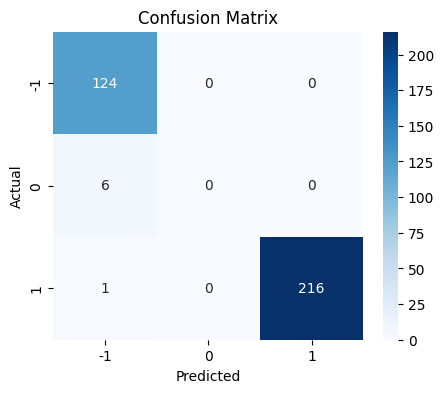

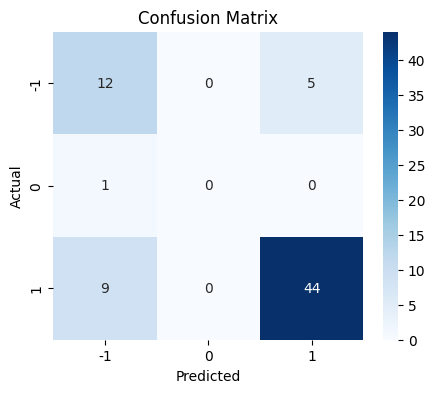

Training performance:
    Accuracy    Recall  Precision        F1
0  0.979827  0.979827   0.963614  0.971455
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.788732  0.788732   0.800909  0.791367
Cumulative Evaluation Results:


,Model,Text Embedding,Hyperparameters,Train_Accuracy,Train_Precision,Train_Recall,Train_F1,Test_Accuracy,Test_Precision,Test_Recall,Test_F1
0,RF Model 1,Word2Vec,"n_est:100, max_dpth:3",0.726225,0.783426,0.726225,0.672437,0.774648,0.745323,0.774648,0.728544
1,RF Model 2,Word2Vec,"n_est:200, max_dpth:3",0.737752,0.790064,0.737752,0.689810,0.774648,0.745323,0.774648,0.728544
2,RF Model 3,Word2Vec,"n_est:100, max_dpth:6",0.916427,0.926279,0.916427,0.912124,0.746479,0.707112,0.746479,0.717294
3,RF Model 4,Sentence Transformer,"n_est:100, max_dpth:3",0.795389,0.828540,0.795389,0.767860,0.732394,0.554527,0.732394,0.631169
4,RF Model 5,Sentence Transformer,"n_est:50, max_dpth:3",0.792507,0.826910,0.792507,0.764137,0.760563,0.730461,0.760563,0.689489
5,RF Model 6,Sentence Transformer,"n_est:30, max_dpth:3",0.815562,0.836669,0.815562,0.793053,0.746479,0.682282,0.746479,0.661547
6,RF Model 7,Sentence Transformer,"n_est:30, max_dpth:6",0.985591,0.985915,0.985591,0.982785,0.732394,0.674139,0.732394,0.685115
7,NN Model 1,Word2Vec,"epochs:20, batch_size:32",0.645533,0.646791,0.645533,0.549196,0.760563,0.720487,0.760563,0.705140
8,NN Model 2,Word2Vec,"epochs:50, batch_size:32",0.639769,0.637559,0.639769,0.534391,0.746479,0.682282,0.746479,0.661547
9,NN Model 3,Word2Vec,"epochs:20, batch_size:64",0.642651,0.639299,0.642651,0.543734,0.760563,0.720487,0.760563,0.705140


In [111]:
# Predict class probabilities on training data
y_train_pred_probs = model.predict(X_train_snt_pd)
# Convert probabilities to class labels
y_train_preds = tf.argmax(y_train_pred_probs, axis=1).numpy()

# Predict class probabilities on test data
y_test_pred_probs = model.predict(X_test_snt_pd)
# Convert probabilities to class labels
y_test_preds = tf.argmax(y_test_pred_probs, axis=1).numpy()

# Converting back 0, 1, 2 class labels given by argmax to [-1, 0, 1] to match utility function expectations
label_mapping = {2: 1, 0: -1, 1: 0}
y_train_preds = np.array([label_mapping[index] for index in y_train_preds])
y_test_preds = np.array([label_mapping[index] for index in y_test_preds])

#plotting confusion matrices
plot_confusion_matrix(y_train,y_train_preds)
plot_confusion_matrix(y_test,y_test_preds)

#Calculating performance metrics on training data
nn_train_wv = model_performance_classification_sklearn(y_train,y_train_preds)
print("Training performance:\n", nn_train_wv)

#Calculating performance metrics on testing data
nn_test_wv = model_performance_classification_sklearn(y_test,y_test_preds)
print("Testing performance:\n", nn_test_wv)

model_eval = {}
#adding model details
model_eval['Model'] = 'NN Model 6'
model_eval['Text Embedding'] = 'Sentence Transformer'
model_eval['Hyperparameters'] = 'epochs:20, batch_size:32, drpout:2(0.2)'
#adding training results
model_eval['Train_Accuracy'] = nn_train_wv.iloc[0]['Accuracy']
model_eval['Train_Precision'] = nn_train_wv.iloc[0]['Precision']
model_eval['Train_Recall'] = nn_train_wv.iloc[0]['Recall']
model_eval['Train_F1'] = nn_train_wv.iloc[0]['F1']
# adding testing results
model_eval['Test_Accuracy'] = nn_test_wv.iloc[0]['Accuracy']
model_eval['Test_Precision'] = nn_test_wv.iloc[0]['Precision']
model_eval['Test_Recall'] = nn_test_wv.iloc[0]['Recall']
model_eval['Test_F1'] = nn_test_wv.iloc[0]['F1']

# Append results to the evaluation_results DataFrame
evaluation_results = pd.concat([evaluation_results, pd.DataFrame([model_eval])], ignore_index=True)

# Display the evaluation_results DataFrame
print("Cumulative Evaluation Results:")
evaluation_results

#### **Model 7**
Lets try with batch size 32 and 1 dropout layer

In [112]:
import gc

# Clear previous sessions
tf.keras.backend.clear_session()
gc.collect()

# Model definition
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(X_train_snt_pd.shape[1],)))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(3, activation='softmax'))  # because we have 3 classes of sentiments

# Compiling the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │        49,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 74,243 (290.01 KB)

 Trainable params: 74,243 (290.01 KB)

 Non-trainable params: 0 (0.00 B)

In [113]:
# Fitting the model
history = model.fit(X_train_snt_pd, y_train_encoded,validation_data=(X_test_snt_pd, y_test_encoded),epochs=20,batch_size=32)

Epoch 1/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.4591 - loss: 1.0463 - val_accuracy: 0.7465 - val_loss: 0.8557
Epoch 2/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6242 - loss: 0.7997 - val_accuracy: 0.7465 - val_loss: 0.6363
Epoch 3/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6486 - loss: 0.6959 - val_accuracy: 0.7324 - val_loss: 0.6539
Epoch 4/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6654 - loss: 0.6959 - val_accuracy: 0.7324 - val_loss: 0.5980
Epoch 5/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6674 - loss: 0.6596 - val_accuracy: 0.7324 - val_loss: 0.5822
Epoch 6/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.7501 - loss: 0.5537 - val_accuracy: 0.7324 - val_loss: 0.5615
Epoch 7/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8161 - loss: 0.4834 - val_accuracy: 0.7465 - val_loss: 0.5410
Epoch 8/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8147 - loss: 0.4815 - val_accuracy: 0.7746 - v

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


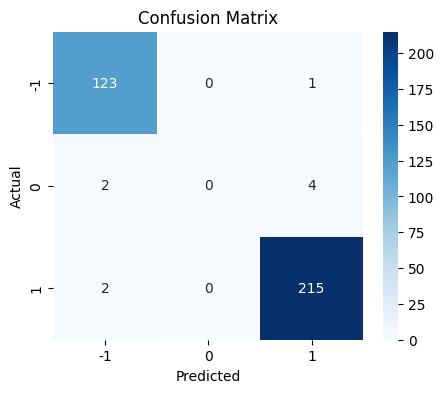

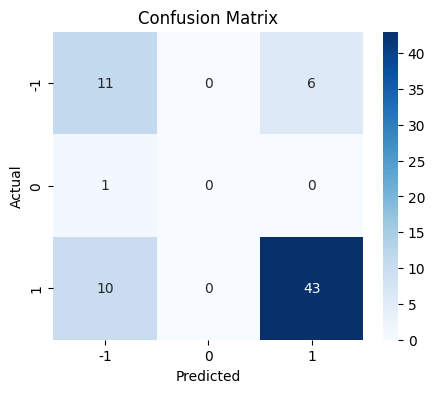

Training performance:
    Accuracy    Recall  Precision        F1
0  0.974063  0.974063   0.957241  0.965573
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.760563  0.760563   0.774792  0.764451
Cumulative Evaluation Results:


,Model,Text Embedding,Hyperparameters,Train_Accuracy,Train_Precision,Train_Recall,Train_F1,Test_Accuracy,Test_Precision,Test_Recall,Test_F1
0,RF Model 1,Word2Vec,"n_est:100, max_dpth:3",0.726225,0.783426,0.726225,0.672437,0.774648,0.745323,0.774648,0.728544
1,RF Model 2,Word2Vec,"n_est:200, max_dpth:3",0.737752,0.790064,0.737752,0.689810,0.774648,0.745323,0.774648,0.728544
2,RF Model 3,Word2Vec,"n_est:100, max_dpth:6",0.916427,0.926279,0.916427,0.912124,0.746479,0.707112,0.746479,0.717294
3,RF Model 4,Sentence Transformer,"n_est:100, max_dpth:3",0.795389,0.828540,0.795389,0.767860,0.732394,0.554527,0.732394,0.631169
4,RF Model 5,Sentence Transformer,"n_est:50, max_dpth:3",0.792507,0.826910,0.792507,0.764137,0.760563,0.730461,0.760563,0.689489
5,RF Model 6,Sentence Transformer,"n_est:30, max_dpth:3",0.815562,0.836669,0.815562,0.793053,0.746479,0.682282,0.746479,0.661547
6,RF Model 7,Sentence Transformer,"n_est:30, max_dpth:6",0.985591,0.985915,0.985591,0.982785,0.732394,0.674139,0.732394,0.685115
7,NN Model 1,Word2Vec,"epochs:20, batch_size:32",0.645533,0.646791,0.645533,0.549196,0.760563,0.720487,0.760563,0.705140
8,NN Model 2,Word2Vec,"epochs:50, batch_size:32",0.639769,0.637559,0.639769,0.534391,0.746479,0.682282,0.746479,0.661547
9,NN Model 3,Word2Vec,"epochs:20, batch_size:64",0.642651,0.639299,0.642651,0.543734,0.760563,0.720487,0.760563,0.705140


In [114]:
# Predict class probabilities on training data
y_train_pred_probs = model.predict(X_train_snt_pd)
# Convert probabilities to class labels
y_train_preds = tf.argmax(y_train_pred_probs, axis=1).numpy()

# Predict class probabilities on test data
y_test_pred_probs = model.predict(X_test_snt_pd)
# Convert probabilities to class labels
y_test_preds = tf.argmax(y_test_pred_probs, axis=1).numpy()

# Converting back 0, 1, 2 class labels given by argmax to [-1, 0, 1] to match utility function expectations
label_mapping = {2: 1, 0: -1, 1: 0}
y_train_preds = np.array([label_mapping[index] for index in y_train_preds])
y_test_preds = np.array([label_mapping[index] for index in y_test_preds])

#plotting confusion matrices
plot_confusion_matrix(y_train,y_train_preds)
plot_confusion_matrix(y_test,y_test_preds)

#Calculating performance metrics on training data
nn_train_wv = model_performance_classification_sklearn(y_train,y_train_preds)
print("Training performance:\n", nn_train_wv)

#Calculating performance metrics on testing data
nn_test_wv = model_performance_classification_sklearn(y_test,y_test_preds)
print("Testing performance:\n", nn_test_wv)

model_eval = {}
#adding model details
model_eval['Model'] = 'NN Model 7'
model_eval['Text Embedding'] = 'Sentence Transformer'
model_eval['Hyperparameters'] = 'epochs:20, batch_size:32, drpout:1(0.2)'
#adding training results
model_eval['Train_Accuracy'] = nn_train_wv.iloc[0]['Accuracy']
model_eval['Train_Precision'] = nn_train_wv.iloc[0]['Precision']
model_eval['Train_Recall'] = nn_train_wv.iloc[0]['Recall']
model_eval['Train_F1'] = nn_train_wv.iloc[0]['F1']
# adding testing results
model_eval['Test_Accuracy'] = nn_test_wv.iloc[0]['Accuracy']
model_eval['Test_Precision'] = nn_test_wv.iloc[0]['Precision']
model_eval['Test_Recall'] = nn_test_wv.iloc[0]['Recall']
model_eval['Test_F1'] = nn_test_wv.iloc[0]['F1']

# Append results to the evaluation_results DataFrame
evaluation_results = pd.concat([evaluation_results, pd.DataFrame([model_eval])], ignore_index=True)

# Display the evaluation_results DataFrame
print("Cumulative Evaluation Results:")
evaluation_results

* The performance has reduced by reducing dropout layer.
* So, keeping 2 dropout layers and batch size 64 in next model

#### **Model 8**
2 dropout layers and batch size 64

In [115]:
import gc

# Clear previous sessions
tf.keras.backend.clear_session()
gc.collect()

# Model definition
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(X_train_snt_pd.shape[1],)))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dense(3, activation='softmax'))  # because we have 3 classes of sentiments

# Compiling the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │        49,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 74,243 (290.01 KB)

 Trainable params: 74,243 (290.01 KB)

 Non-trainable params: 0 (0.00 B)

In [116]:
# Fitting the model
history = model.fit(X_train_snt_pd, y_train_encoded,validation_data=(X_test_snt_pd, y_test_encoded),epochs=20,batch_size=64)

Epoch 1/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 123ms/step - accuracy: 0.4785 - loss: 1.0626 - val_accuracy: 0.7465 - val_loss: 0.9200
Epoch 2/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.6344 - loss: 0.9044 - val_accuracy: 0.7465 - val_loss: 0.7367
Epoch 3/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.6208 - loss: 0.7691 - val_accuracy: 0.7465 - val_loss: 0.6366
Epoch 4/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.6419 - loss: 0.6871 - val_accuracy: 0.7042 - val_loss: 0.6339
Epoch 5/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.6683 - loss: 0.6751 - val_accuracy: 0.7183 - val_loss: 0.6041
Epoch 6/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.7257 - loss: 0.6296 - val_accuracy: 0.7606 - val_loss: 0.5821
Epoch 7/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.6437 - loss: 0.6315 - val_accuracy: 0.7183 - val_loss: 0.5598
Epoch 8/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.7186 - loss: 0.5951 - val_accuracy: 0.7324 - val_loss: 0.5339

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


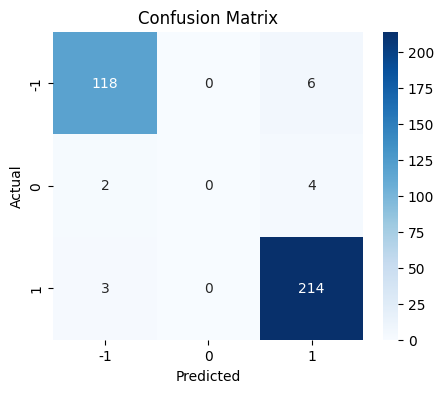

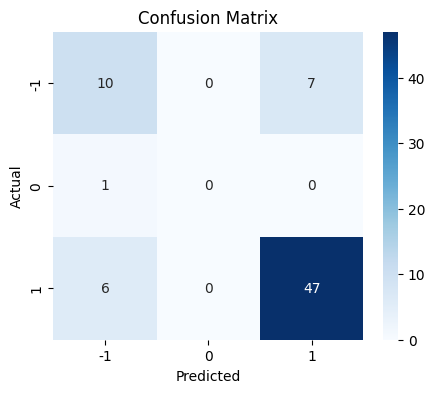

Training performance:
    Accuracy    Recall  Precision       F1
0  0.956772  0.956772   0.940265  0.94836
Testing performance:
    Accuracy    Recall  Precision       F1
0  0.802817  0.802817   0.790558  0.79663
Cumulative Evaluation Results:


,Model,Text Embedding,Hyperparameters,Train_Accuracy,Train_Precision,Train_Recall,Train_F1,Test_Accuracy,Test_Precision,Test_Recall,Test_F1
0,RF Model 1,Word2Vec,"n_est:100, max_dpth:3",0.726225,0.783426,0.726225,0.672437,0.774648,0.745323,0.774648,0.728544
1,RF Model 2,Word2Vec,"n_est:200, max_dpth:3",0.737752,0.790064,0.737752,0.689810,0.774648,0.745323,0.774648,0.728544
2,RF Model 3,Word2Vec,"n_est:100, max_dpth:6",0.916427,0.926279,0.916427,0.912124,0.746479,0.707112,0.746479,0.717294
3,RF Model 4,Sentence Transformer,"n_est:100, max_dpth:3",0.795389,0.828540,0.795389,0.767860,0.732394,0.554527,0.732394,0.631169
4,RF Model 5,Sentence Transformer,"n_est:50, max_dpth:3",0.792507,0.826910,0.792507,0.764137,0.760563,0.730461,0.760563,0.689489
5,RF Model 6,Sentence Transformer,"n_est:30, max_dpth:3",0.815562,0.836669,0.815562,0.793053,0.746479,0.682282,0.746479,0.661547
6,RF Model 7,Sentence Transformer,"n_est:30, max_dpth:6",0.985591,0.985915,0.985591,0.982785,0.732394,0.674139,0.732394,0.685115
7,NN Model 1,Word2Vec,"epochs:20, batch_size:32",0.645533,0.646791,0.645533,0.549196,0.760563,0.720487,0.760563,0.705140
8,NN Model 2,Word2Vec,"epochs:50, batch_size:32",0.639769,0.637559,0.639769,0.534391,0.746479,0.682282,0.746479,0.661547
9,NN Model 3,Word2Vec,"epochs:20, batch_size:64",0.642651,0.639299,0.642651,0.543734,0.760563,0.720487,0.760563,0.705140


In [117]:
# Predict class probabilities on training data
y_train_pred_probs = model.predict(X_train_snt_pd)
# Convert probabilities to class labels
y_train_preds = tf.argmax(y_train_pred_probs, axis=1).numpy()

# Predict class probabilities on test data
y_test_pred_probs = model.predict(X_test_snt_pd)
# Convert probabilities to class labels
y_test_preds = tf.argmax(y_test_pred_probs, axis=1).numpy()

# Converting back 0, 1, 2 class labels given by argmax to [-1, 0, 1] to match utility function expectations
label_mapping = {2: 1, 0: -1, 1: 0}
y_train_preds = np.array([label_mapping[index] for index in y_train_preds])
y_test_preds = np.array([label_mapping[index] for index in y_test_preds])

#plotting confusion matrices
plot_confusion_matrix(y_train,y_train_preds)
plot_confusion_matrix(y_test,y_test_preds)

#Calculating performance metrics on training data
nn_train_wv = model_performance_classification_sklearn(y_train,y_train_preds)
print("Training performance:\n", nn_train_wv)

#Calculating performance metrics on testing data
nn_test_wv = model_performance_classification_sklearn(y_test,y_test_preds)
print("Testing performance:\n", nn_test_wv)

model_eval = {}
#adding model details
model_eval['Model'] = 'NN Model 8'
model_eval['Text Embedding'] = 'Sentence Transformer'
model_eval['Hyperparameters'] = 'epochs:20, batch_size:64, drpout:2(0.2)'
#adding training results
model_eval['Train_Accuracy'] = nn_train_wv.iloc[0]['Accuracy']
model_eval['Train_Precision'] = nn_train_wv.iloc[0]['Precision']
model_eval['Train_Recall'] = nn_train_wv.iloc[0]['Recall']
model_eval['Train_F1'] = nn_train_wv.iloc[0]['F1']
# adding testing results
model_eval['Test_Accuracy'] = nn_test_wv.iloc[0]['Accuracy']
model_eval['Test_Precision'] = nn_test_wv.iloc[0]['Precision']
model_eval['Test_Recall'] = nn_test_wv.iloc[0]['Recall']
model_eval['Test_F1'] = nn_test_wv.iloc[0]['F1']

# Append results to the evaluation_results DataFrame
evaluation_results = pd.concat([evaluation_results, pd.DataFrame([model_eval])], ignore_index=True)

# Display the evaluation_results DataFrame
print("Cumulative Evaluation Results:")
evaluation_results

* This is so far the best model with training performance close to 95% and testing performance close to 80%.

### **Model Performance Summary and Final Model Selection**

In [118]:
#printing our models summary
evaluation_results

,Model,Text Embedding,Hyperparameters,Train_Accuracy,Train_Precision,Train_Recall,Train_F1,Test_Accuracy,Test_Precision,Test_Recall,Test_F1
0,RF Model 1,Word2Vec,"n_est:100, max_dpth:3",0.726225,0.783426,0.726225,0.672437,0.774648,0.745323,0.774648,0.728544
1,RF Model 2,Word2Vec,"n_est:200, max_dpth:3",0.737752,0.790064,0.737752,0.689810,0.774648,0.745323,0.774648,0.728544
2,RF Model 3,Word2Vec,"n_est:100, max_dpth:6",0.916427,0.926279,0.916427,0.912124,0.746479,0.707112,0.746479,0.717294
3,RF Model 4,Sentence Transformer,"n_est:100, max_dpth:3",0.795389,0.828540,0.795389,0.767860,0.732394,0.554527,0.732394,0.631169
4,RF Model 5,Sentence Transformer,"n_est:50, max_dpth:3",0.792507,0.826910,0.792507,0.764137,0.760563,0.730461,0.760563,0.689489
5,RF Model 6,Sentence Transformer,"n_est:30, max_dpth:3",0.815562,0.836669,0.815562,0.793053,0.746479,0.682282,0.746479,0.661547
6,RF Model 7,Sentence Transformer,"n_est:30, max_dpth:6",0.985591,0.985915,0.985591,0.982785,0.732394,0.674139,0.732394,0.685115
7,NN Model 1,Word2Vec,"epochs:20, batch_size:32",0.645533,0.646791,0.645533,0.549196,0.760563,0.720487,0.760563,0.705140
8,NN Model 2,Word2Vec,"epochs:50, batch_size:32",0.639769,0.637559,0.639769,0.534391,0.746479,0.682282,0.746479,0.661547
9,NN Model 3,Word2Vec,"epochs:20, batch_size:64",0.642651,0.639299,0.642651,0.543734,0.760563,0.720487,0.760563,0.705140


We select the NN Model 8 with epochs=32, batch size=64, and 2 dropout layers of 0.2. This model gave 95% F1-score on training set and 80% F1-score on testing set. So, we choose the NN Model 8 with Sentence Transformers embedding and described NN structure.

## **Conclusions and Recommendations**

- Our model achieved 95% performance metrics on training data and 80% on testing data. So, it can be used to solve the business problem of stock's sentiment analysis.
- Sentence Transformer embeddings are context-aware and gave better performance on testing data on both RF and NN as compared to Word2Vec.
- AMong RF and NN models, the performance of NN models is far better as they can capture complex patterns in given data.
- We select NN Model 8, with sentence transformer, lower number of epochs and moderate batch size of 64. And dropout layers prevent the overfitting, making our model to generalize better on testing data.
- Further, recommendation is collect more data with more number of records, which can further improve the sentiment classification performance of the NN Model.


<font size=6 color='blue'>Power Ahead</font>
___